
---

## Explanation of Dataset Columns

1. **Area**: This column likely represents the geographical area or region where the agricultural data was collected. Preprocessing for this column may involve encoding categorical data if you plan to use it in predictive modeling. Techniques like one-hot encoding or label encoding can be applied, depending on the algorithm you intend to use.             ***categorical***

2. **Item**: This column likely represents the type of crop or agricultural product being grown. Similar to the "Area" column, preprocessing may involve encoding categorical data.***categorical***

3. **Year**: This column represents the year when the data was recorded. It's essential for time-series analysis and forecasting. You may not need extensive preprocessing for this column

4. **Average Rainfall (mm per year)**: This column indicates the average annual rainfall in millimeters. You should check for missing data and outliers. Impute missing values with an appropriate strategy (e.g., mean, median, interpolation) and consider handling outliers.

5. **Pesticides (tonnes)**: This column represents the amount of pesticides used. Similar to rainfall, check for missing data and outliers. You might need to normalize or standardize the values to have a consistent scale.

6. **Average Temperature**: This column represents the average annual temperature. Check for missing data and outliers. Normalize or standardize the values if necessary.

7. **Yield (hg/ha)**: This column is the yield per hectare, often measured in hectograms per hectare. This is your target variable. You'll need to check for missing data, outliers, and decide if transformation (e.g., log transformation) is necessary for a more normal distribution.

---

## Preprocessing Steps for Yield Prediction

1. **Data Cleaning**: Address missing data and outliers in all columns. You may choose to remove or impute missing values and handle outliers appropriately, either by capping/extending them or transforming the data.

2. **Feature Engineering**: Create new features if needed. For example, you might want to calculate the total precipitation over a certain period or create seasonality features from the year and month columns.

3. **Normalization/Standardization**: Normalize or standardize numerical features like rainfall, temperature, and pesticide usage if you plan to use algorithms sensitive to scale(the case of regression and svm), like neural networks or K-means clustering.

4. **Encoding Categorical Data**: Encode categorical features like "Area" and "Item" using techniques like one-hot encoding or label encoding.


5. **Train-Test Split**: Split your data into training and testing sets to evaluate the model's performance.

6. **Model Selection**: Choose an appropriate machine learning or statistical model for yield prediction. Time-series forecasting methods like ARIMA, LSTM, or traditional regression models may be suitable depending on the nature of your data.

7. **Evaluation and Optimization**: Evaluate the model's performance using appropriate metrics (e.g., RMSE, MAE, R-squared) and optimize hyperparameters as needed.

8. **Prediction**: Use the trained model to predict upcoming yields based on input data, including future values of relevant features like rainfall and temperature.

9. **Monitoring**: Continuously monitor and update the model as new data becomes available to maintain its accuracy and relevance.


# **Data Cleaning: Addressing Missing Data**
**Step 1: Identify Missing Data**

The first step is to identify which columns have missing data and how much is missing. We'll focus on the "Average Rainfall," "Pesticides," and "Yield" columns.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving climate-ds.csv to climate-ds (1).csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('climate-ds.csv')

# Check for missing values
missing_data = data.isnull().sum()
print(missing_data)


Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64



**Step 2: Handle Missing Data**

There are several strategies for handling missing data:


*   Removing rows with missing data.
*   Imputing missing values using the mean, median, or a predictive model.
*   Interpolation for time-series data.

AL7amduLLELAH there is no missing data








In [ ]:
# Impute missing values with the mean
#data['average_rain_fall_mm_per_year'].fillna(data['average_rain_fall_mm_per_year'].mean(), inplace=True)


**Step 3: Identify Outliers**

To identify outliers, we can create box plots for the columns of interest, such as "Pesticides" and "Yield." Outliers are typically values that fall significantly above or below the whiskers of the box plot.

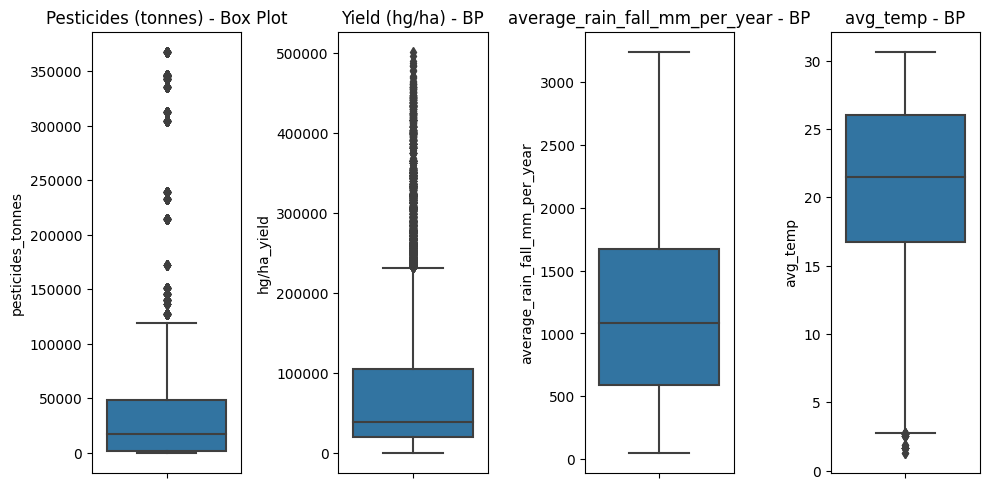

In [3]:
# Create box plots to visualize outliers over all the data points
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
sns.boxplot(y=data['pesticides_tonnes'])
plt.title('Pesticides (tonnes) - Box Plot')

plt.subplot(1, 4, 2)
sns.boxplot(y=data['hg/ha_yield'])
plt.title('Yield (hg/ha) - BP')

plt.subplot(1, 4, 3)
sns.boxplot(y=data['average_rain_fall_mm_per_year'])
plt.title('average_rain_fall_mm_per_year - BP')

plt.subplot(1, 4, 4)
sns.boxplot(y=data['avg_temp'])
plt.title('avg_temp - BP')


plt.tight_layout()
plt.show()


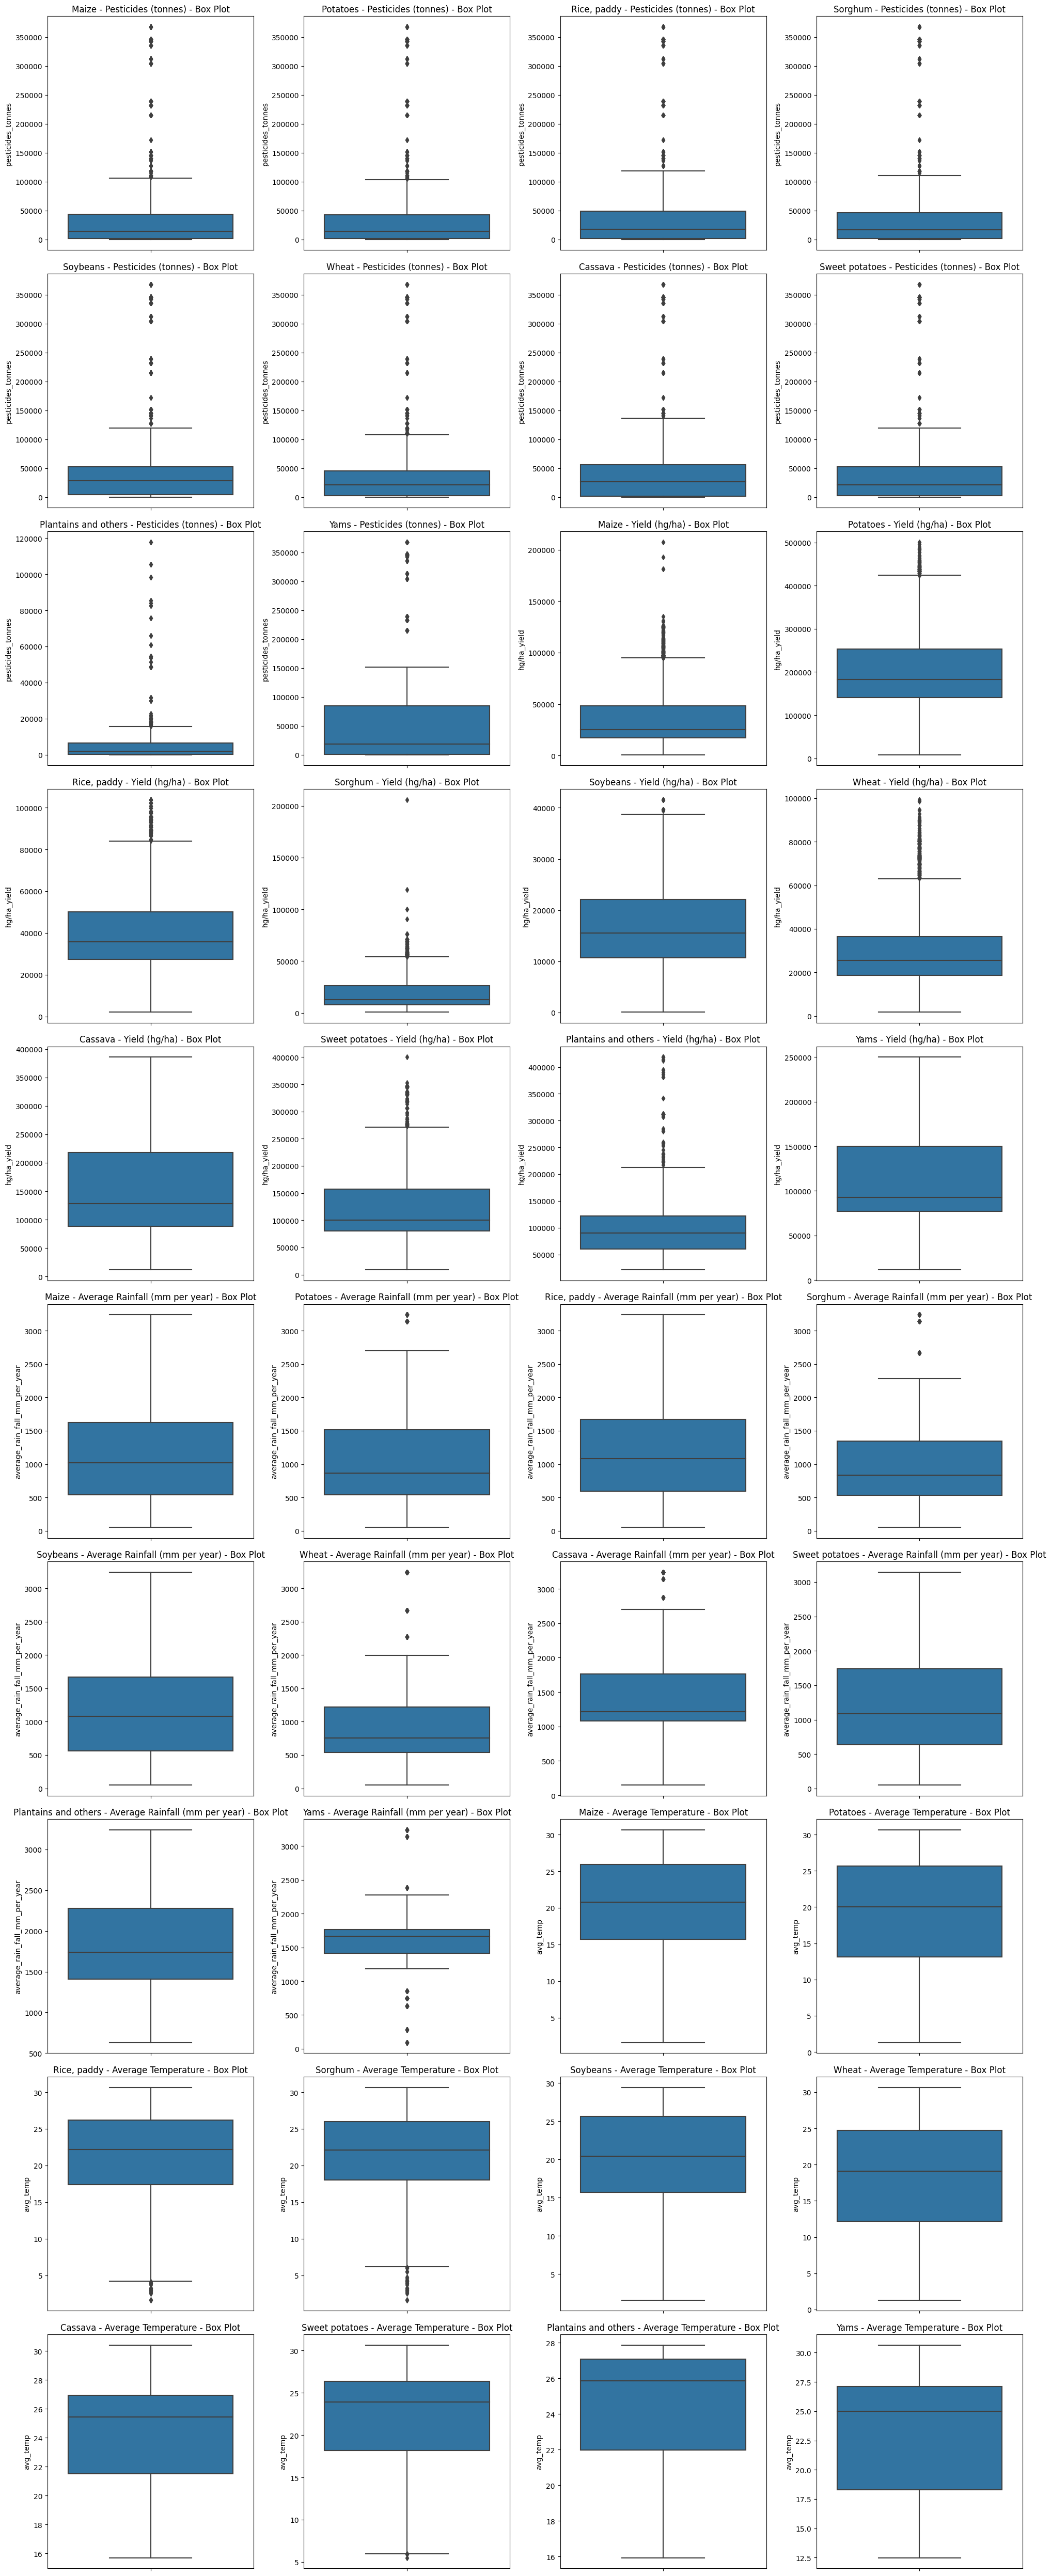

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique items in the "Item" column
unique_items = data['Item'].unique()

# Create subplots for each unique item
plt.figure(figsize=(20, 5 * len(unique_items)))
for idx, item in enumerate(unique_items, 1):
    item_data = data[data['Item'] == item]
    plt.subplot(len(unique_items), 4, idx)
    sns.boxplot(y=item_data['pesticides_tonnes'])
    plt.title(f'{item} - Pesticides (tonnes) - Box Plot')

    plt.subplot(len(unique_items), 4, idx + len(unique_items))
    sns.boxplot(y=item_data['hg/ha_yield'])
    plt.title(f'{item} - Yield (hg/ha) - Box Plot')

    plt.subplot(len(unique_items), 4, idx + 2 * len(unique_items))
    sns.boxplot(y=item_data['average_rain_fall_mm_per_year'])
    plt.title(f'{item} - Average Rainfall (mm per year) - Box Plot')

    plt.subplot(len(unique_items), 4, idx + 3 * len(unique_items))
    sns.boxplot(y=item_data['avg_temp'])
    plt.title(f'{item} - Average Temperature - Box Plot')

plt.tight_layout()
plt.show()

#as you can see all the outliers are within the same range for each type of item


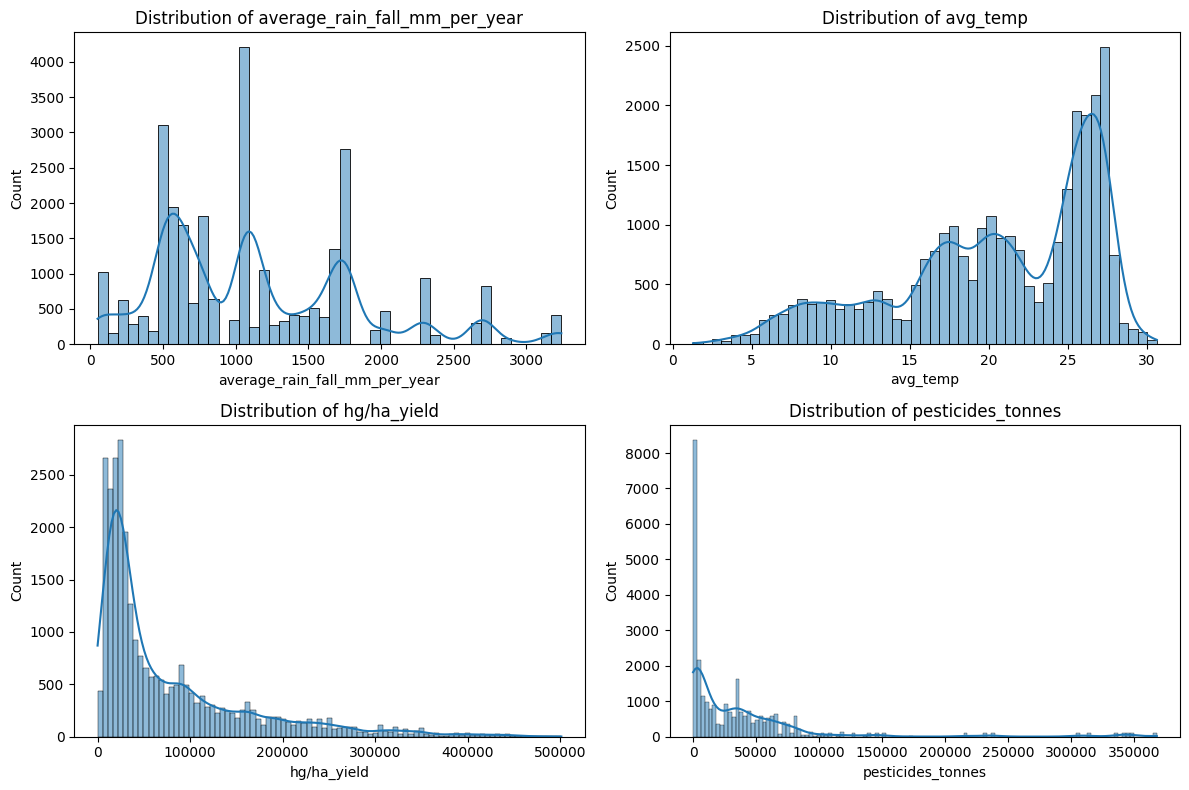

In [5]:
# Define the numerical columns for which you want to create distribution plots
numerical_columns = ['average_rain_fall_mm_per_year', 'avg_temp', 'hg/ha_yield', 'pesticides_tonnes']

# Set up a grid of subplots for the distribution plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate through the numerical columns and create distribution plots
for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 2)
    sns.histplot(data=data, x=column, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

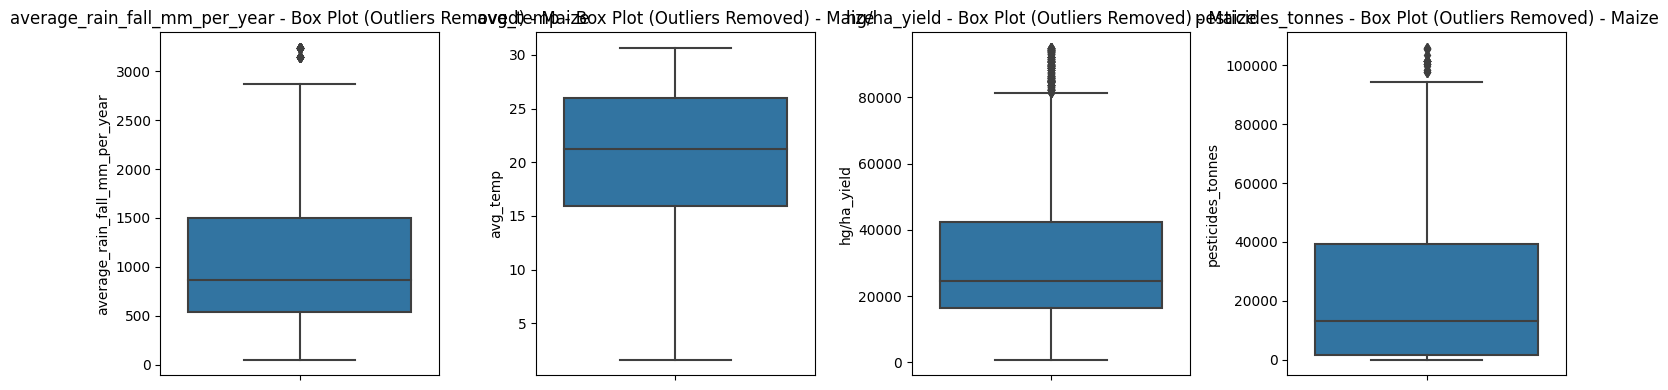

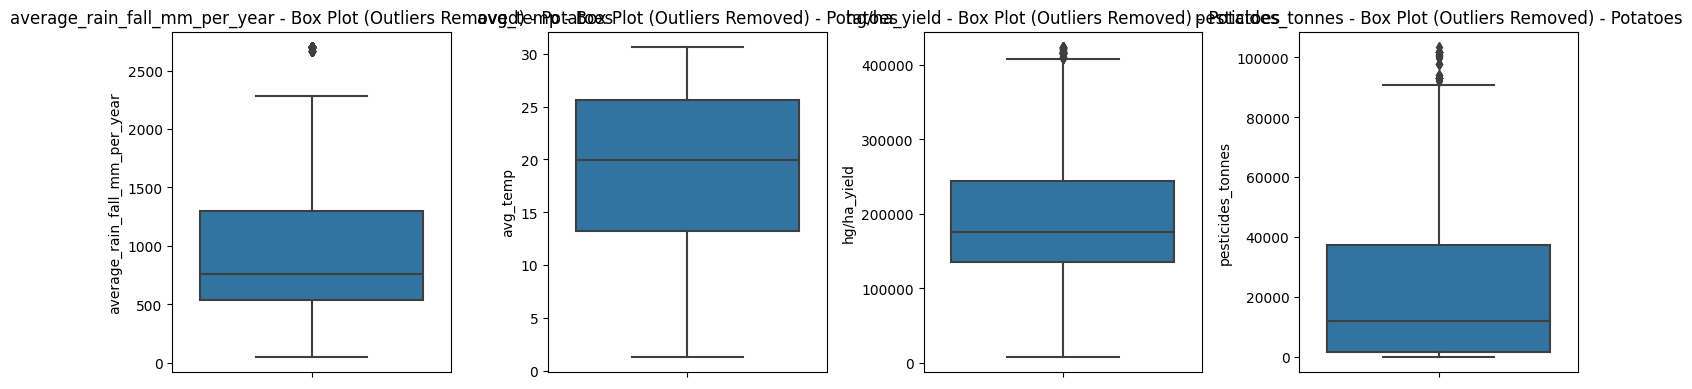

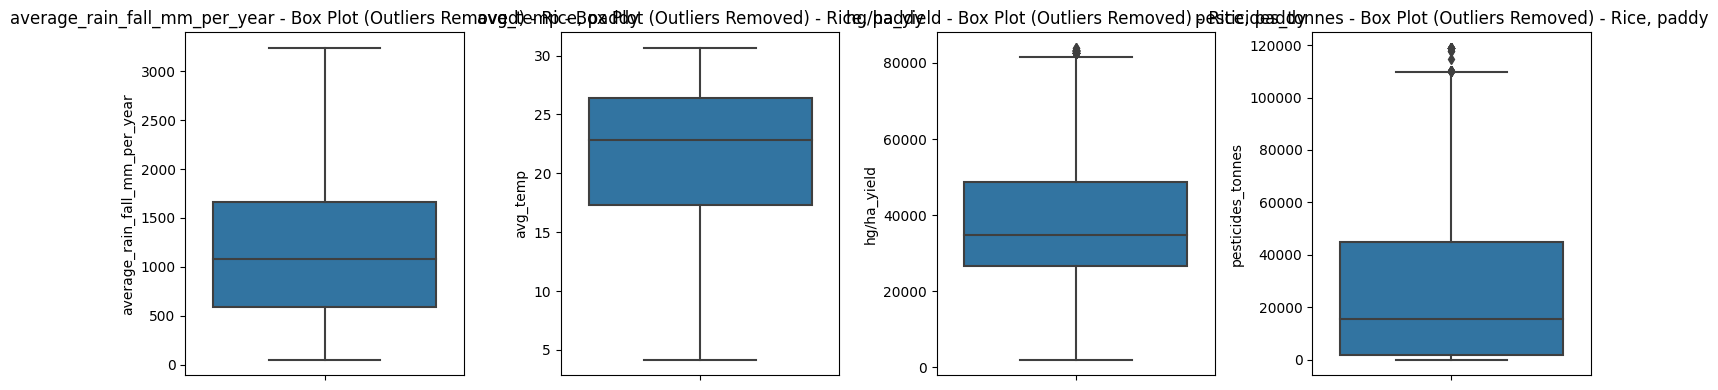

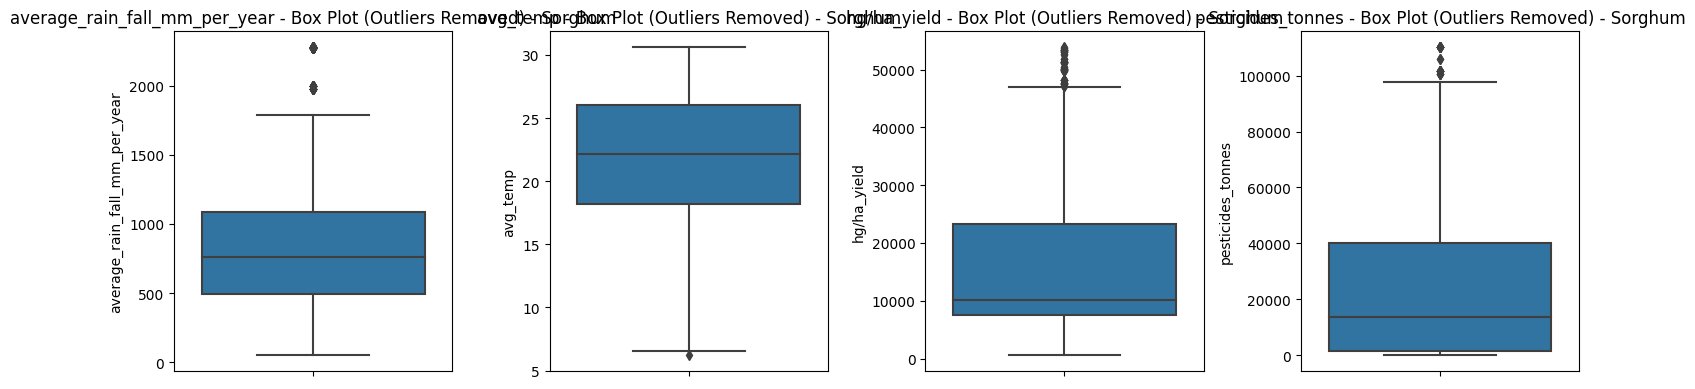

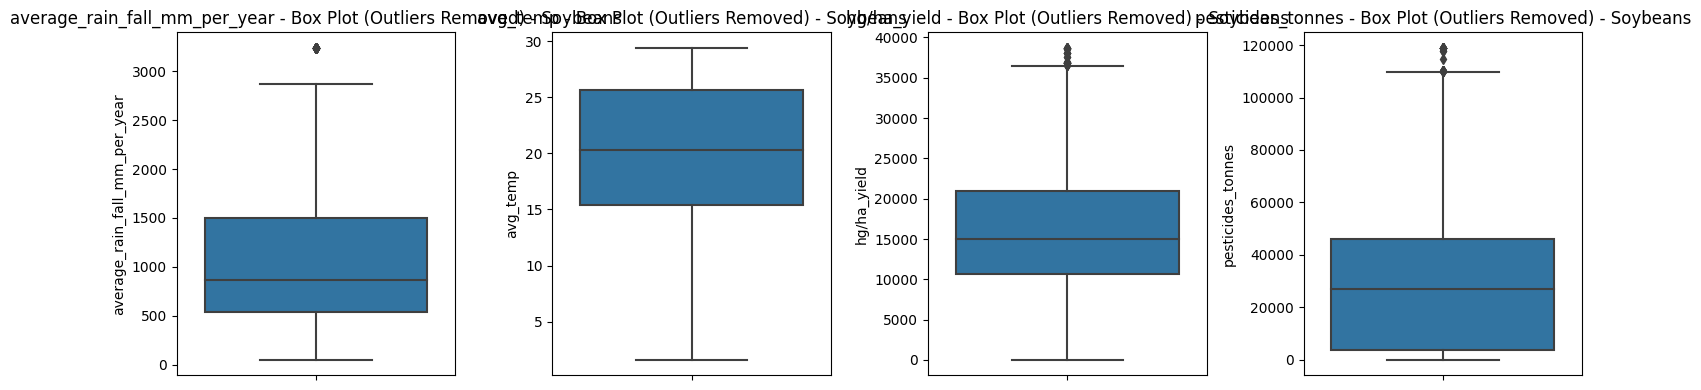

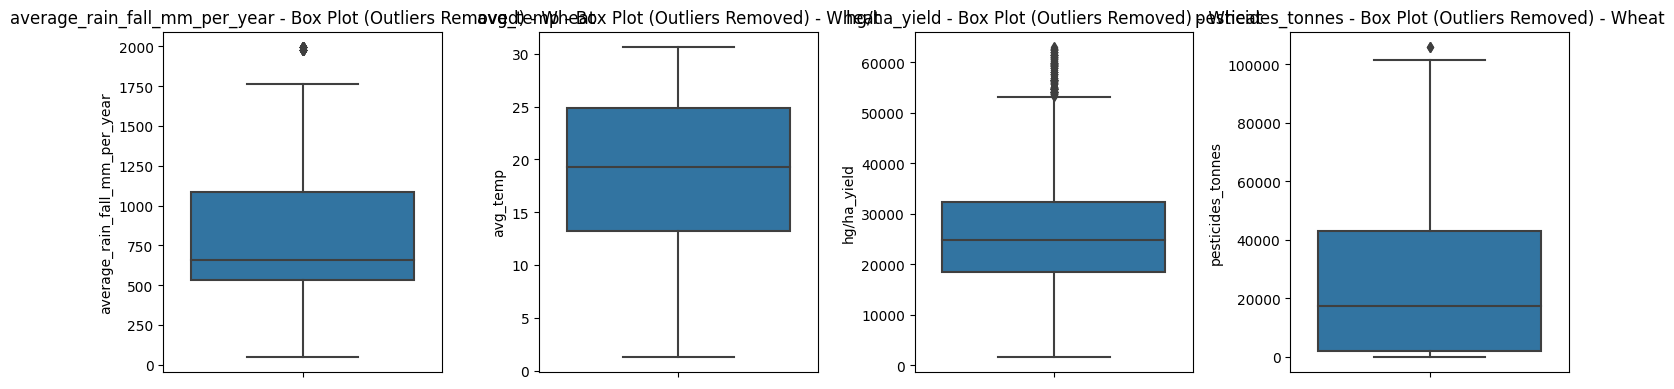

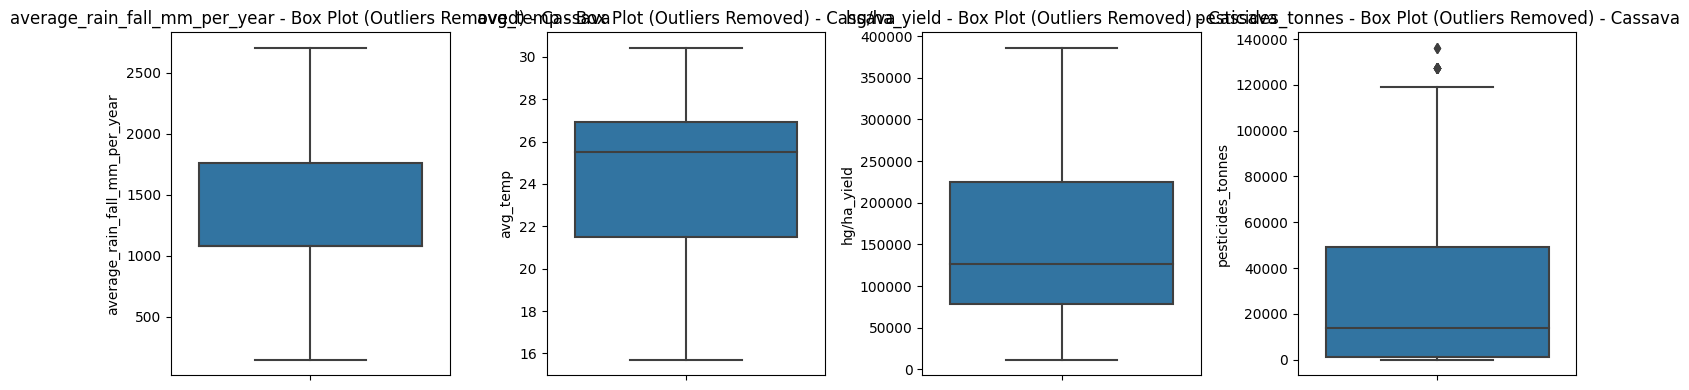

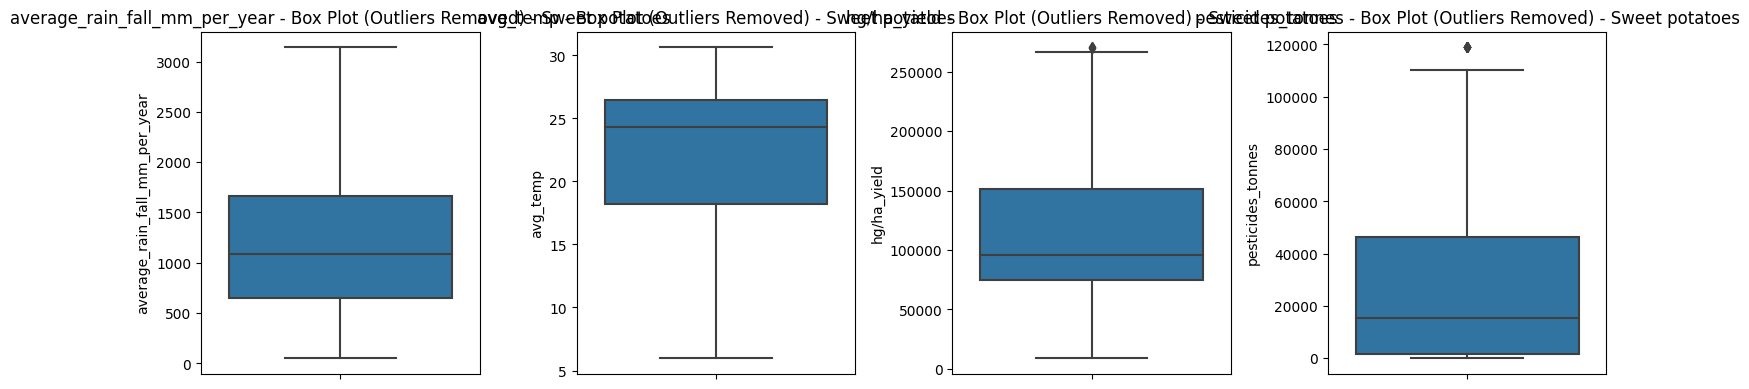

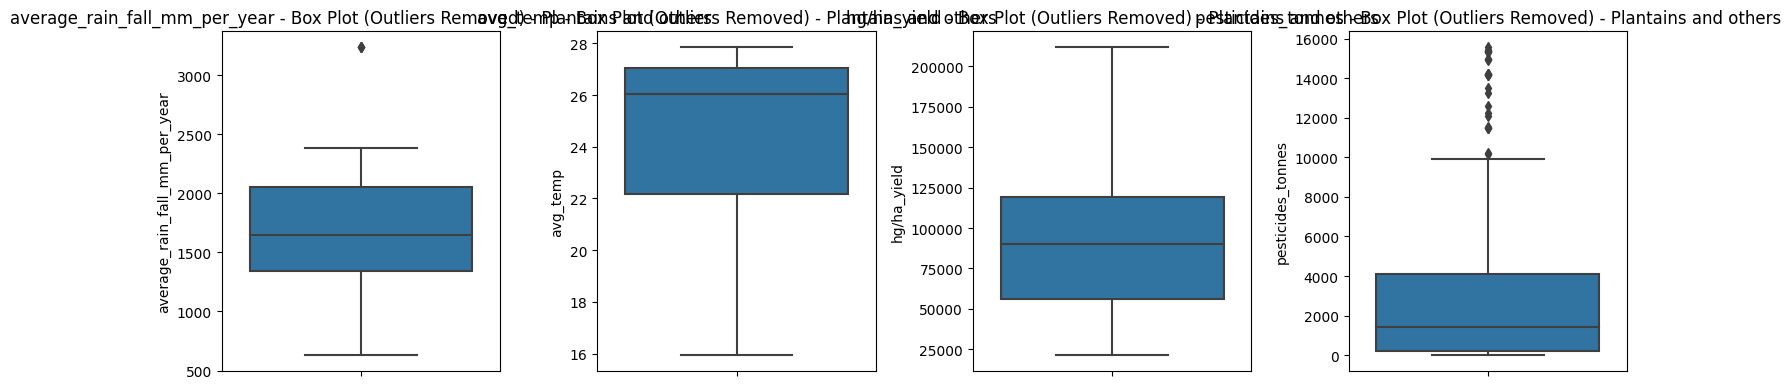

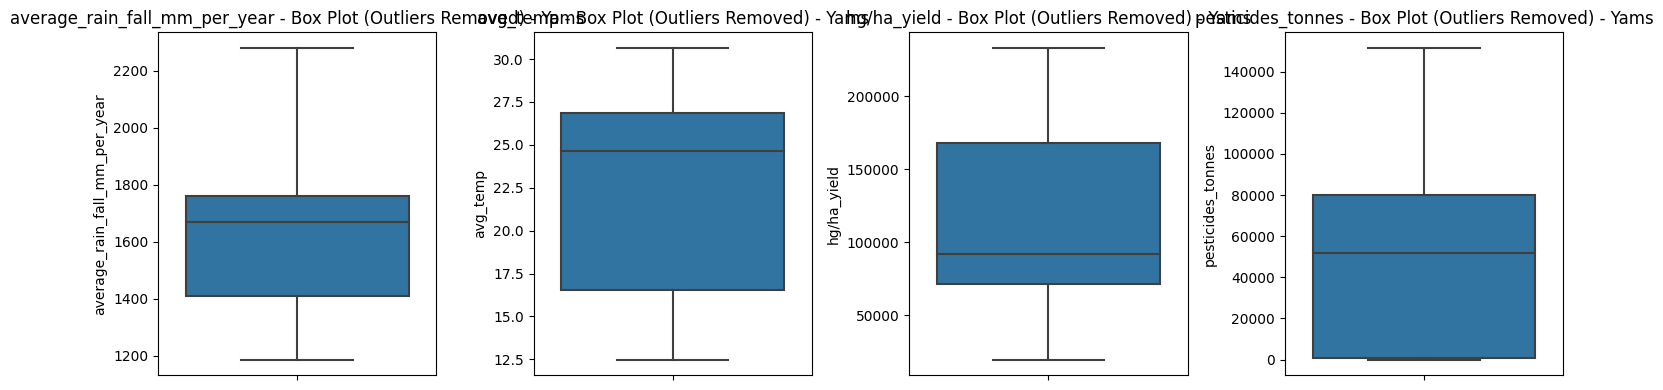

In [6]:
# Get unique items in the "Item" column
unique_items = data['Item'].unique()

# Columns to consider for outlier removal
columns_to_check = ['average_rain_fall_mm_per_year', 'avg_temp', 'hg/ha_yield', 'pesticides_tonnes']

# Create a dictionary to store cleaned data for each item
cleaned_data_by_item = {}

# Iterate through each unique "Item" and remove outliers
for item in unique_items:
    item_data = data[data['Item'] == item]
    cleaned_data = item_data.copy()  # Create a copy to preserve the original data

    for column in columns_to_check:
        # Calculate the IQR (Interquartile Range) for the column
        Q1 = item_data[column].quantile(0.25)
        Q3 = item_data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers for the current item
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]

    # Store cleaned data for the current item in the dictionary
    cleaned_data_by_item[item] = cleaned_data

# Visualize the box plots for each item after outlier removal
for item in unique_items:
    plt.figure(figsize=(15, 4))
    for i, column in enumerate(columns_to_check, 1):
        plt.subplot(1, 4, i)
        sns.boxplot(y=cleaned_data_by_item[item][column])
        plt.title(f'{column} - Box Plot (Outliers Removed) - {item}')

    plt.tight_layout()
    plt.show()


# Combine the cleaned data for all unique items into a single DataFrame
combined_cleaned_data = pd.concat(cleaned_data_by_item.values(), ignore_index=True)

# Save the combined cleaned data to a new CSV file
combined_cleaned_data.to_csv('combined_cleaned_data.csv', index=False)
# Now, the 'cleaned_data_by_item' dictionary contains the cleaned data for each unique item.


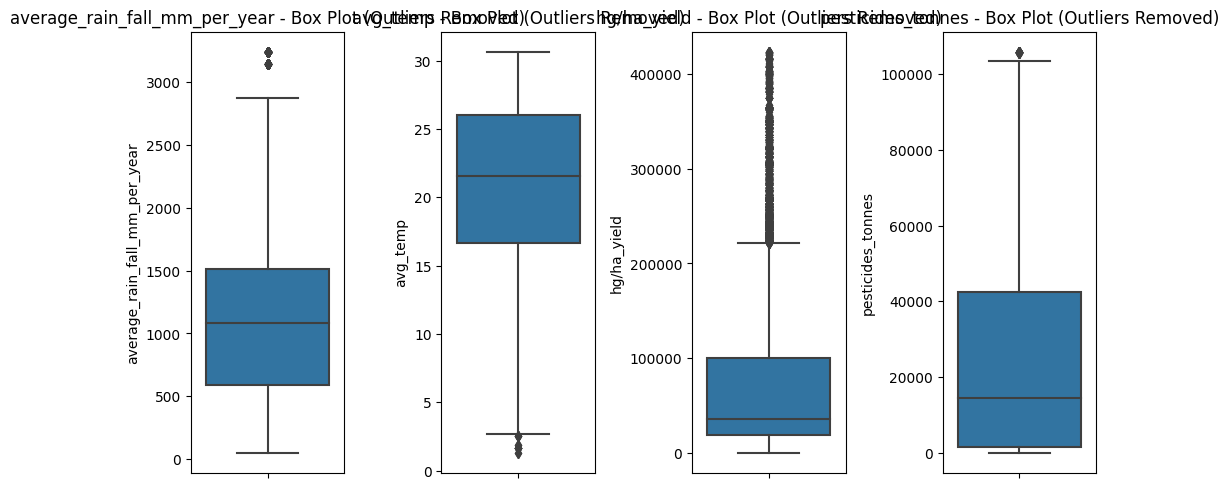

In [7]:
# Columns to consider for outlier removal
columns_to_check = ['average_rain_fall_mm_per_year', 'avg_temp', 'hg/ha_yield', 'pesticides_tonnes']

# Iterate through the specified columns and remove outliers
for column in columns_to_check:
    # Calculate the IQR (Interquartile Range) for the column
    Q1 = combined_cleaned_data[column].quantile(0.25)
    Q3 = combined_cleaned_data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers and create a new DataFrame
    data = combined_cleaned_data[(combined_cleaned_data[column] >= lower_bound) & (combined_cleaned_data[column] <= upper_bound)]


# Visualize the box plots again to confirm outlier removal
plt.figure(figsize=(10, 5))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=data[column])
    plt.title(f'{column} - Box Plot (Outliers Removed)')

plt.tight_layout()
plt.show()

# Now, the 'data' DataFrame contains the data with outliers removed for the specified columns.


<ipython-input-8-e28baf846666>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


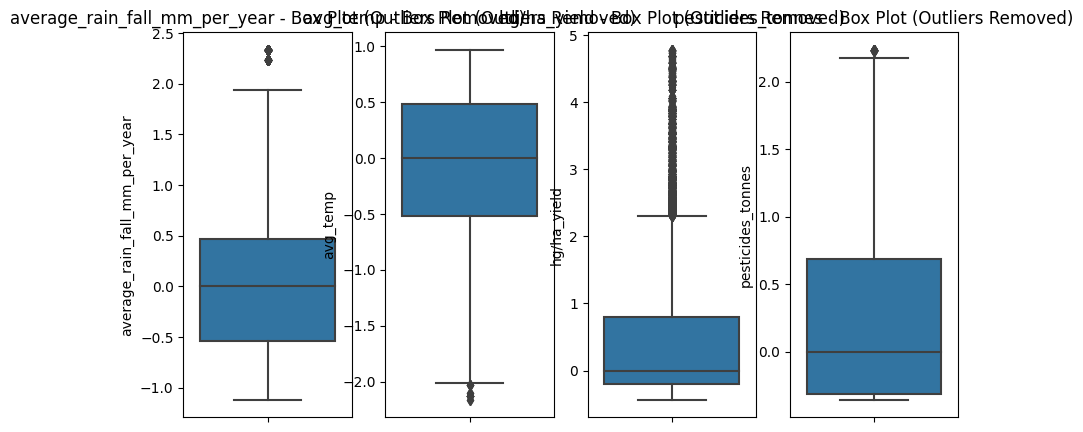

In [8]:

from sklearn.preprocessing import RobustScaler

# Define the numerical columns you want to scale
numerical_columns = ['average_rain_fall_mm_per_year', 'avg_temp', 'hg/ha_yield', 'pesticides_tonnes']

# Create a RobustScaler instance
scaler = RobustScaler()

# Scale the selected numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Visualize the box plots again to confirm outlier removal
plt.figure(figsize=(10, 5))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=data[column])
    plt.title(f'{column} - Box Plot (Outliers Removed)')

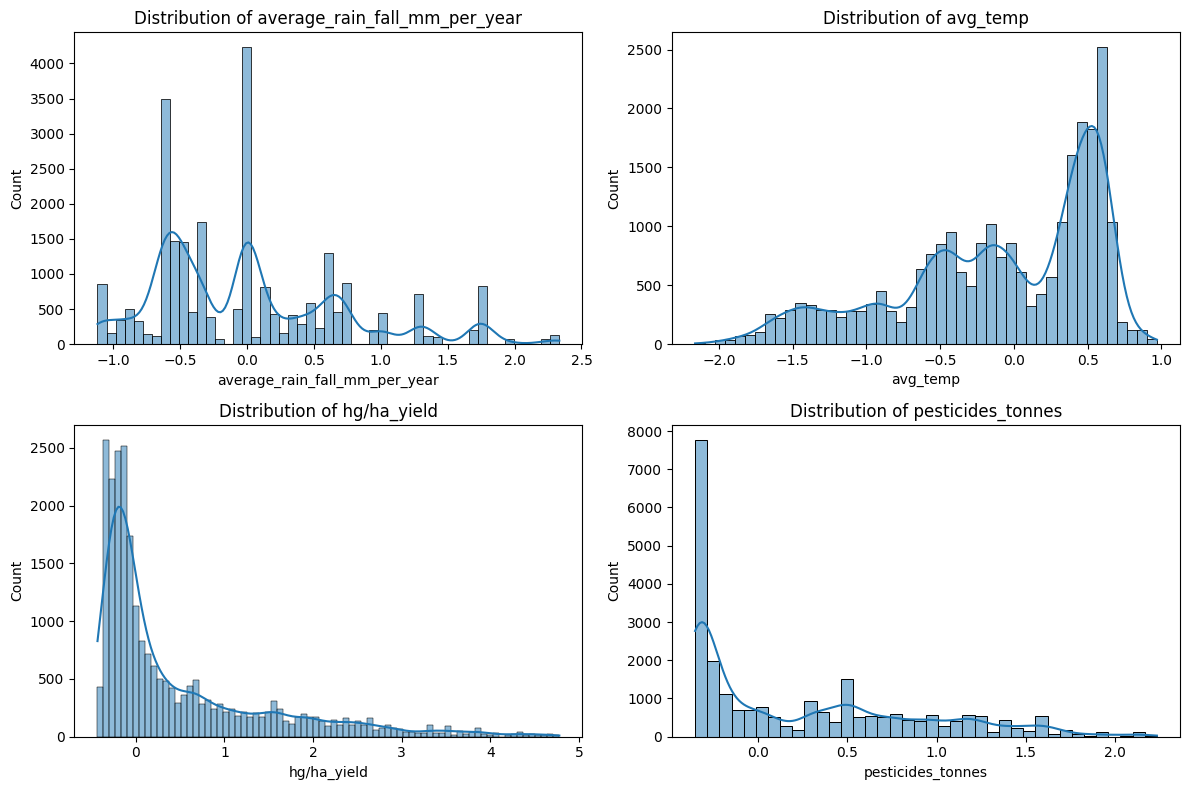

In [9]:
# Define the numerical columns for which you want to create distribution plots
numerical_columns = ['average_rain_fall_mm_per_year', 'avg_temp', 'hg/ha_yield', 'pesticides_tonnes']

# Set up a grid of subplots for the distribution plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate through the numerical columns and create distribution plots
for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 2)
    sns.histplot(data=data, x=column, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

firstly we have to go area by area as different soil types have different yeild predictions per crop type


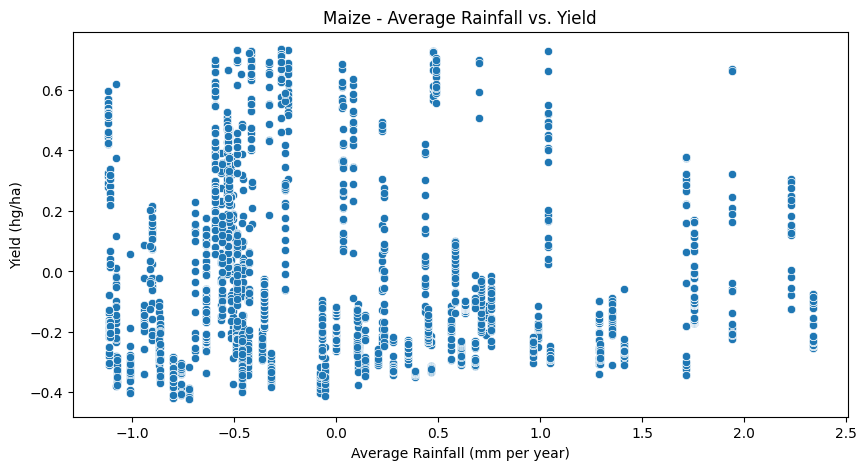

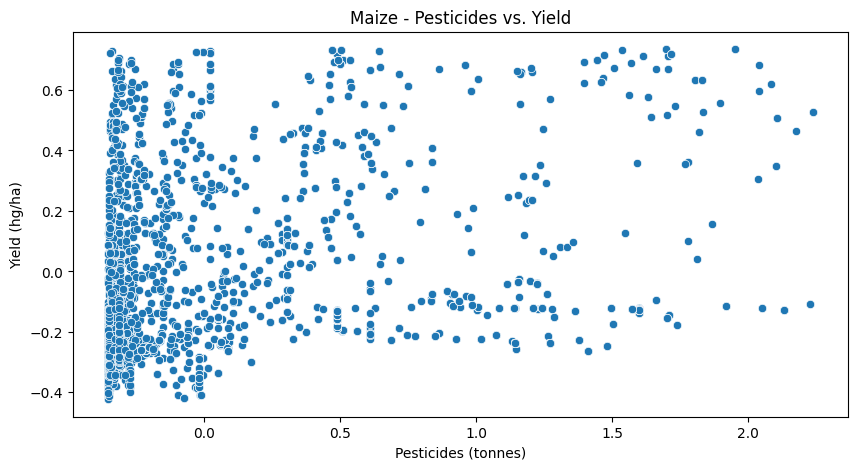

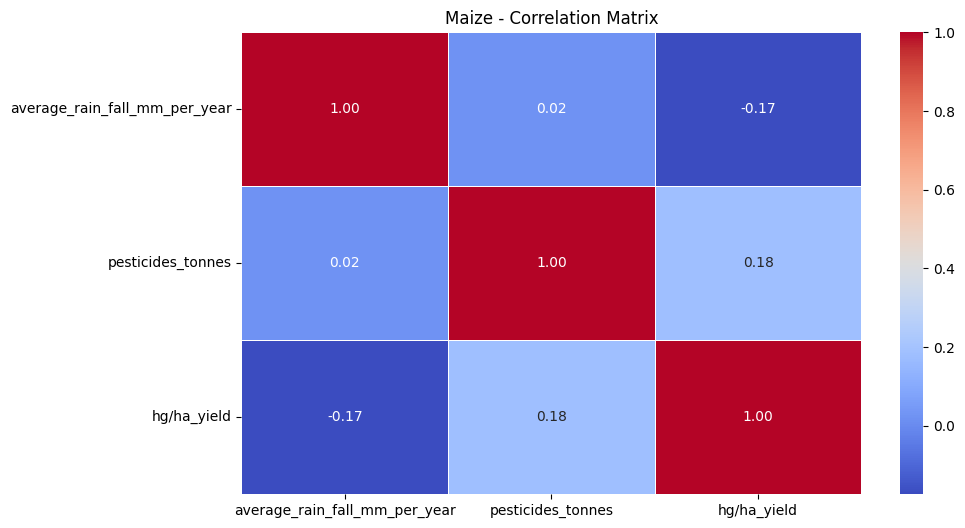

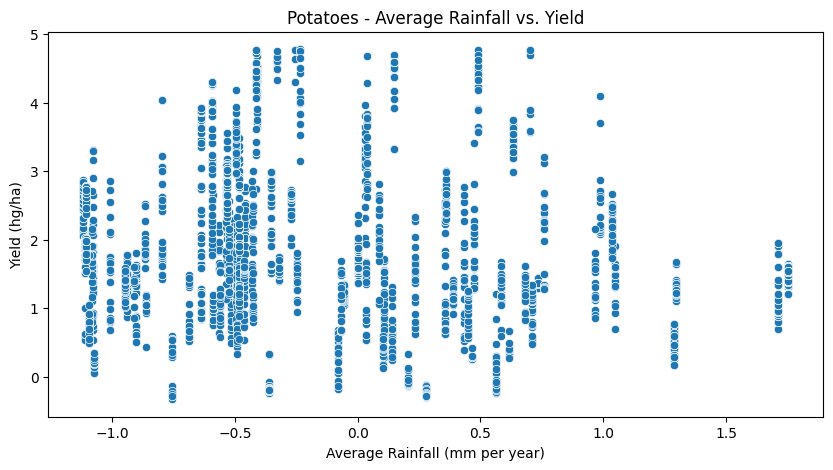

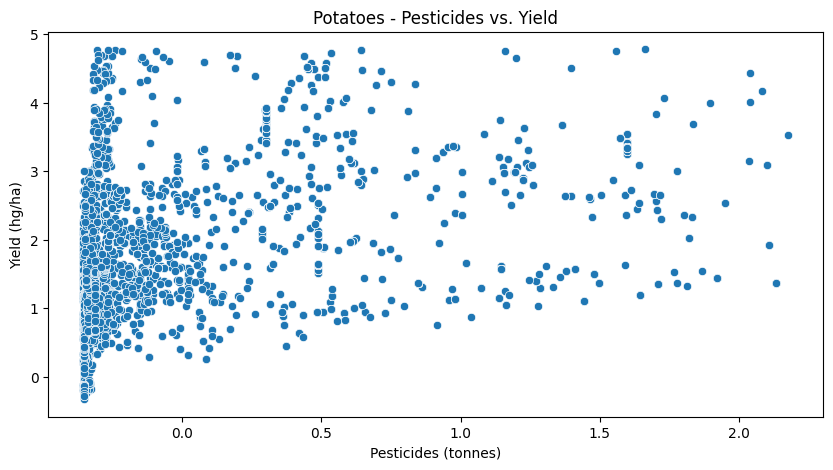

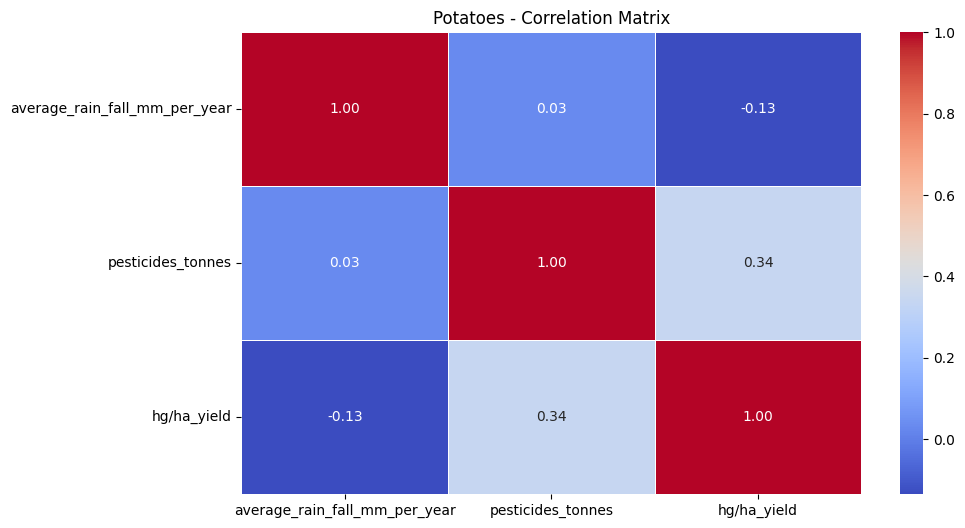

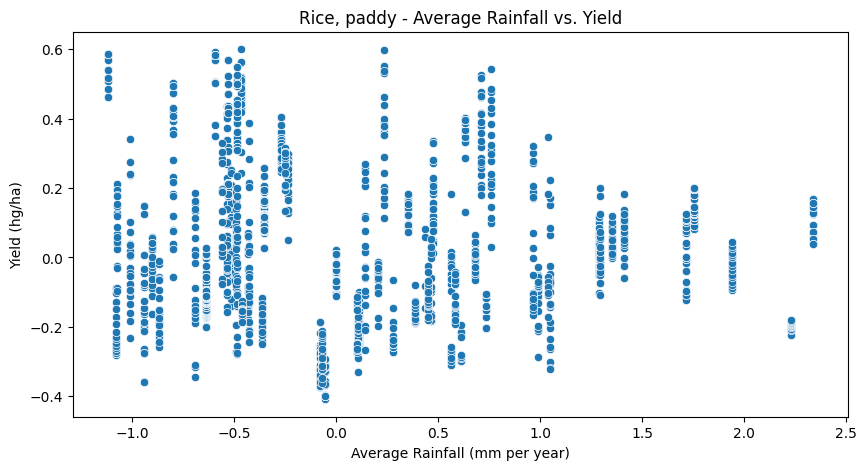

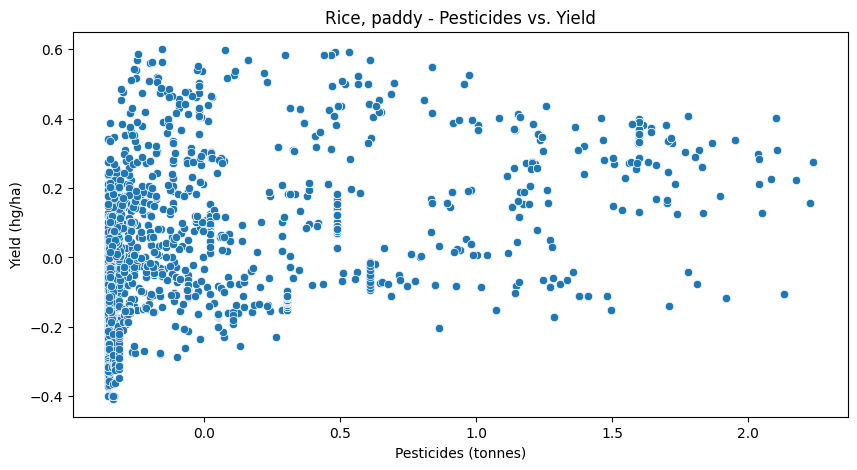

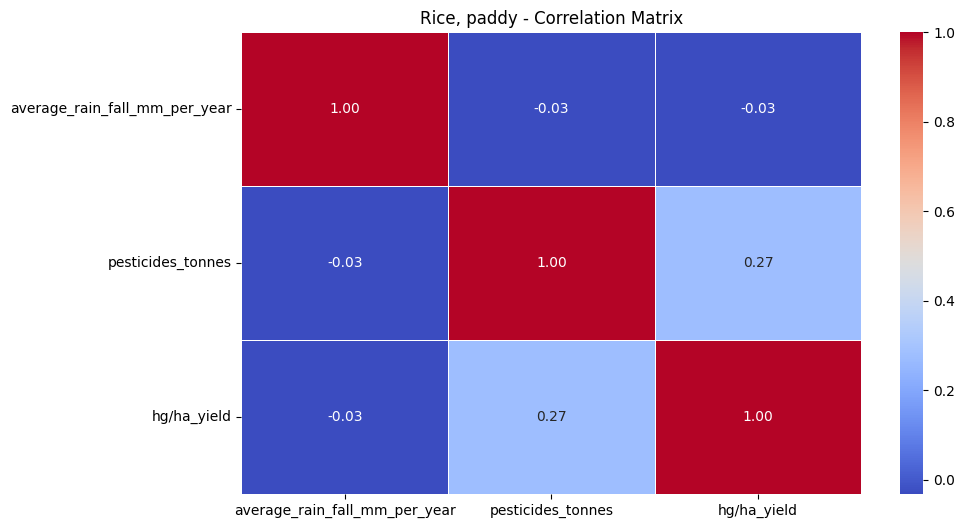

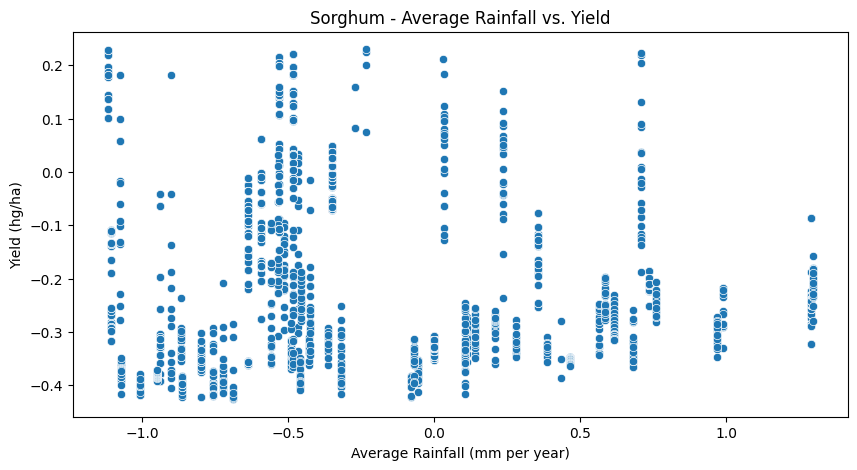

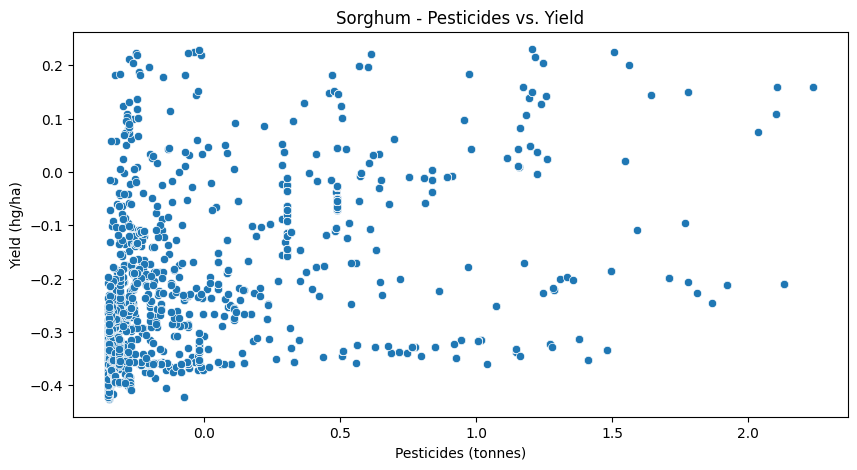

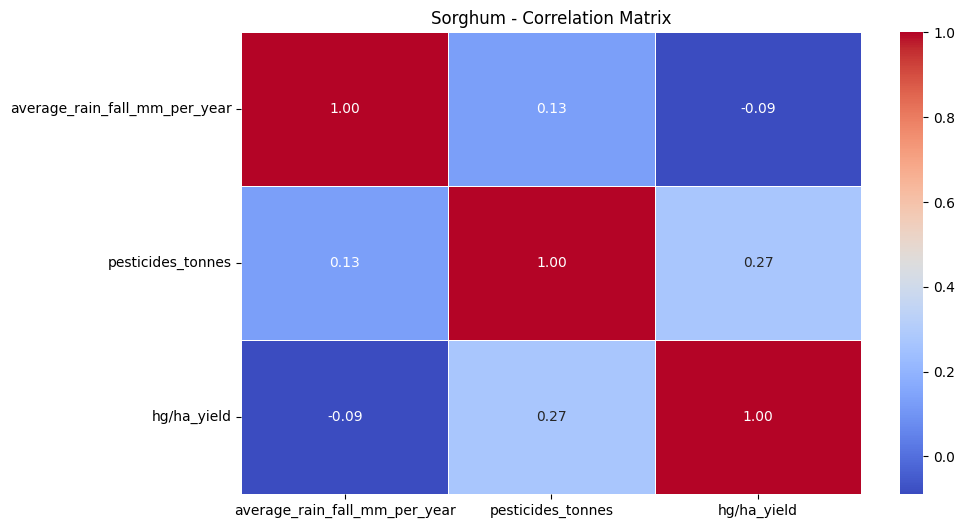

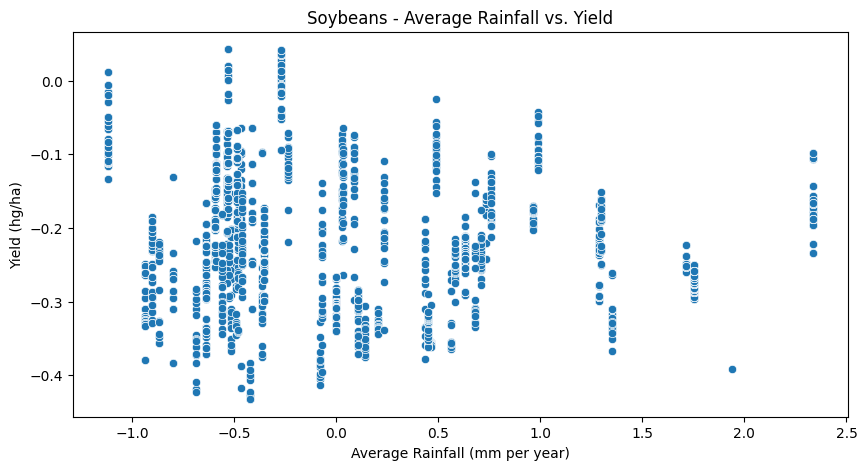

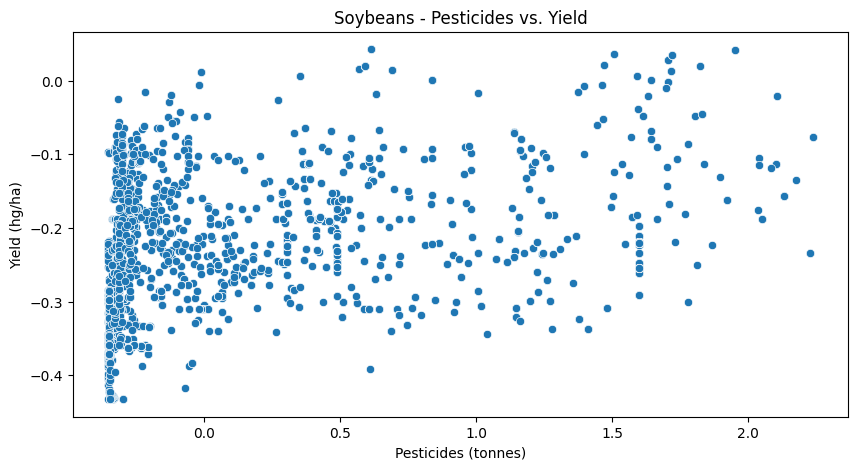

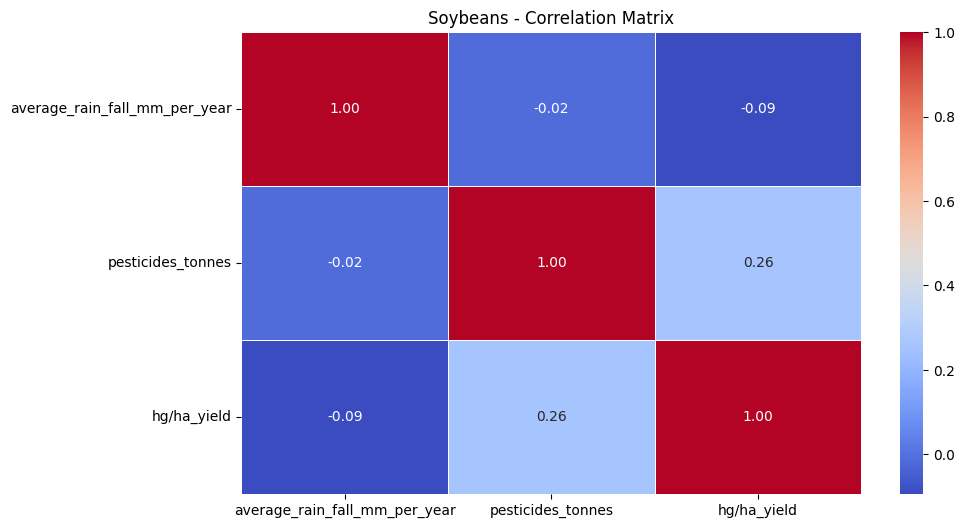

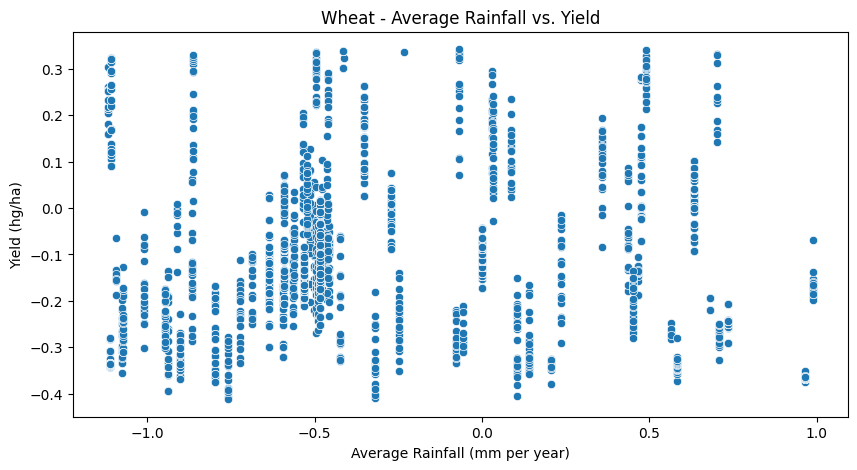

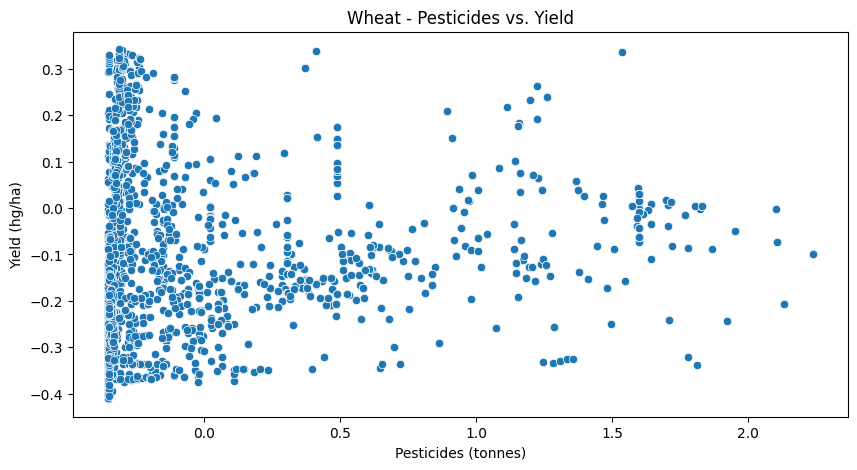

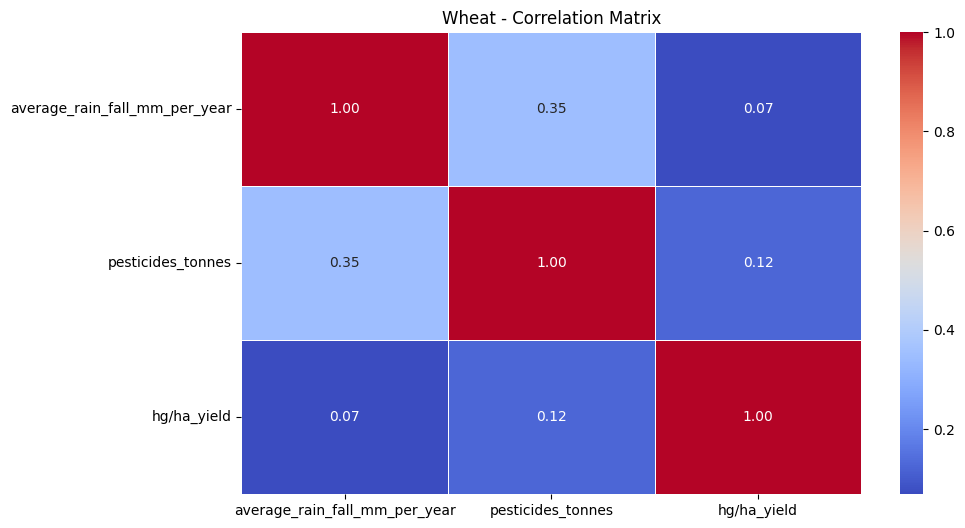

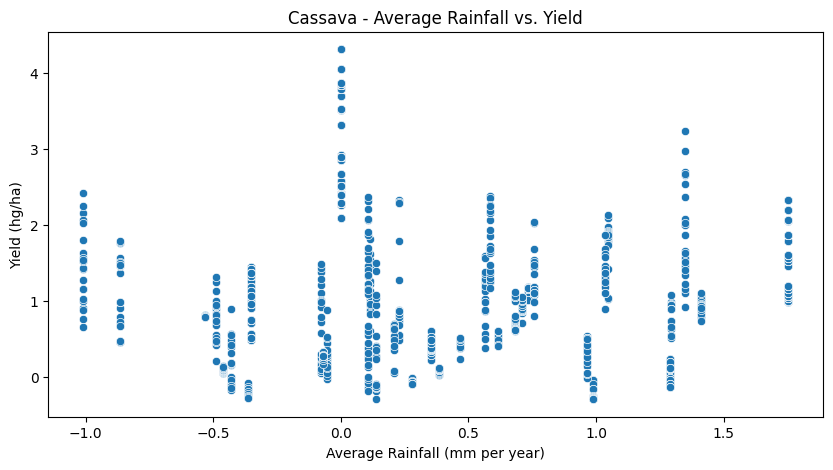

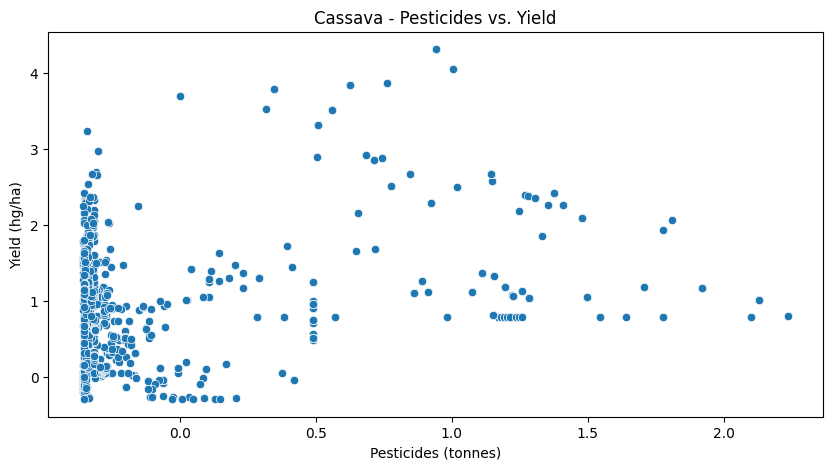

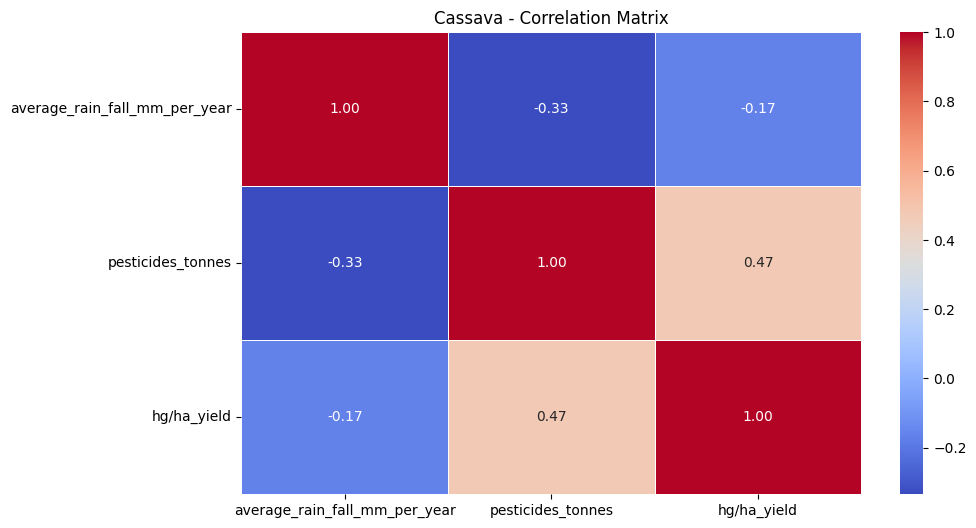

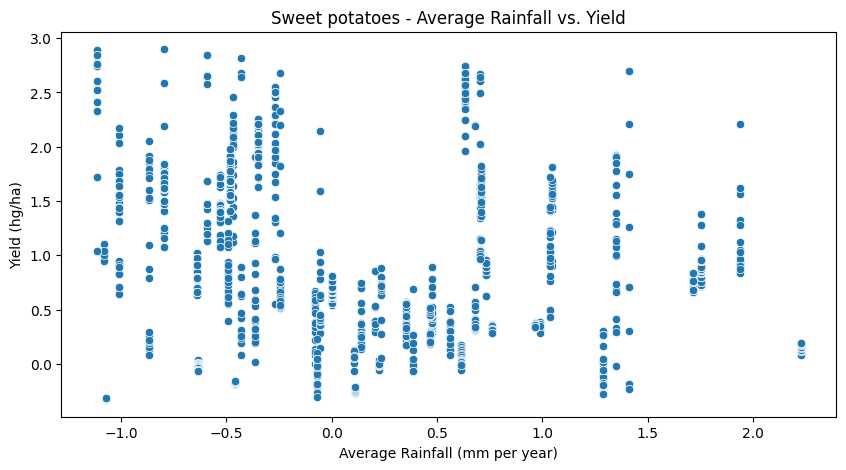

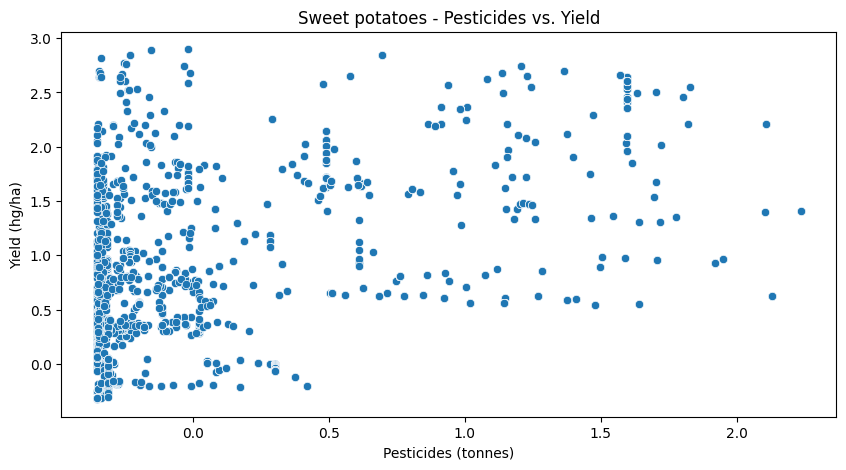

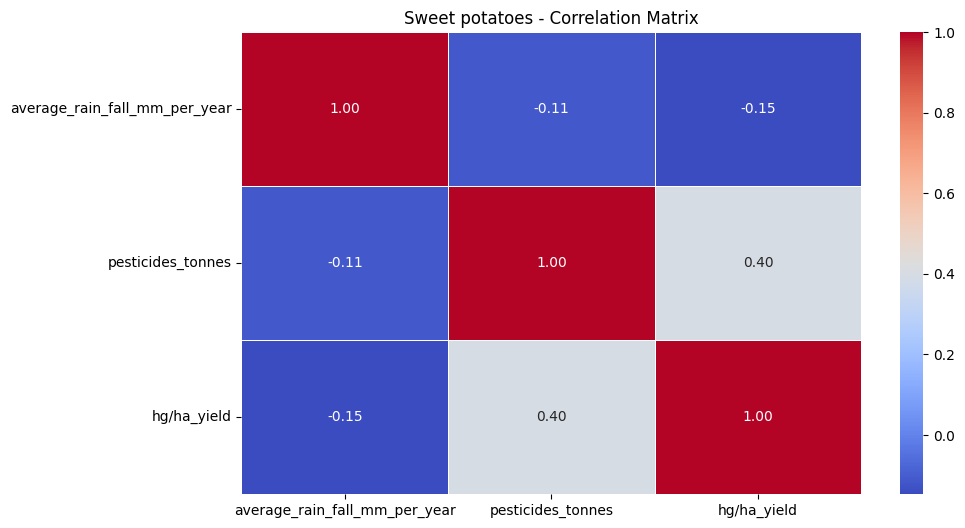

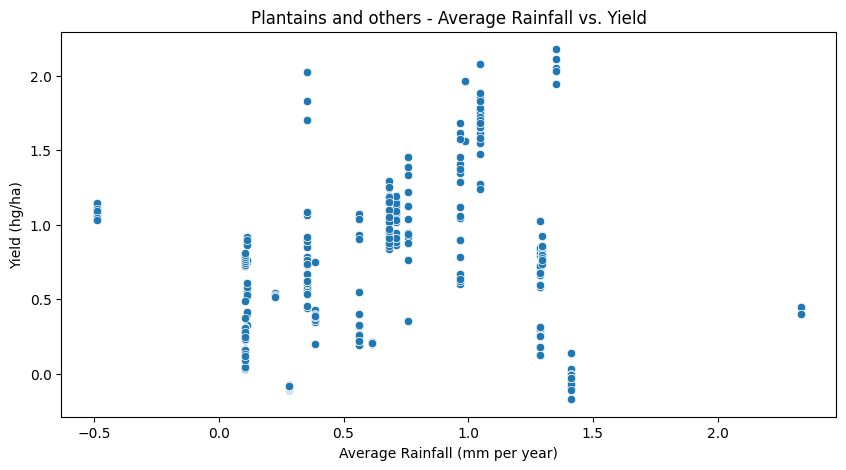

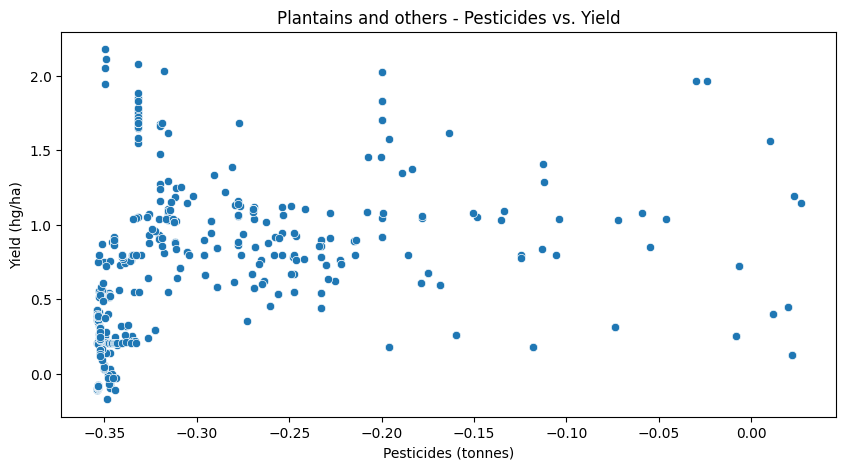

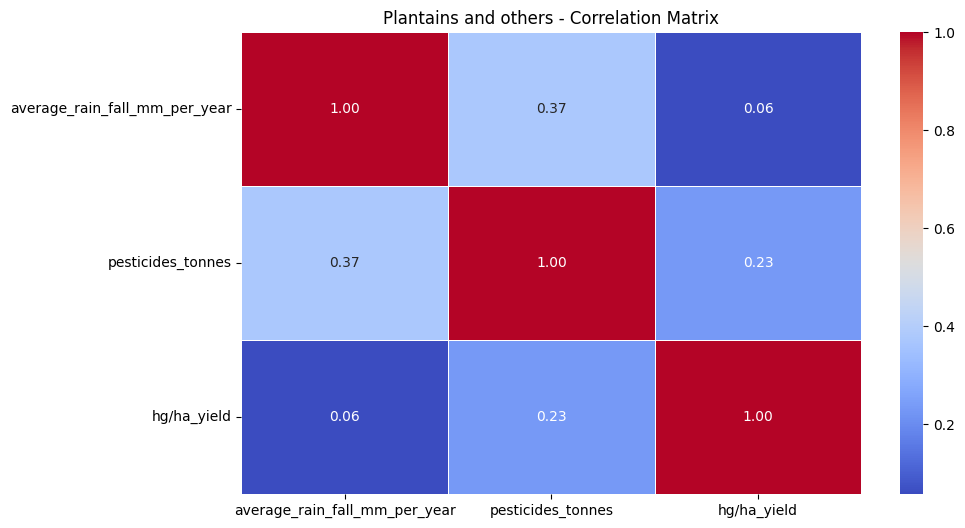

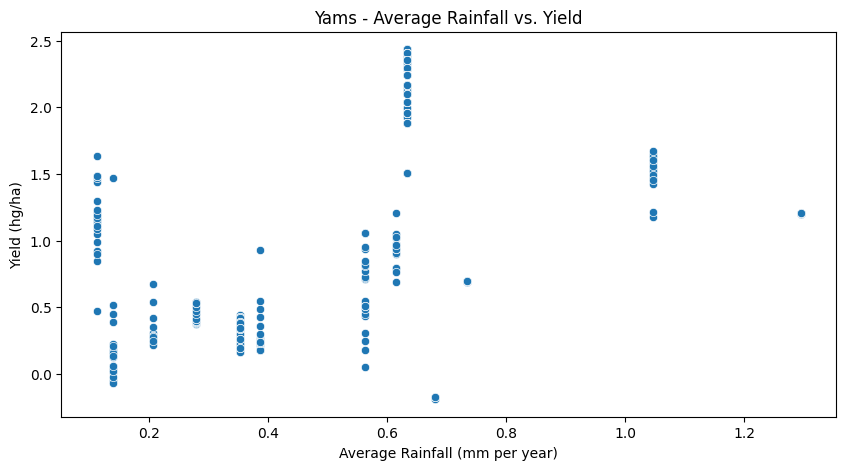

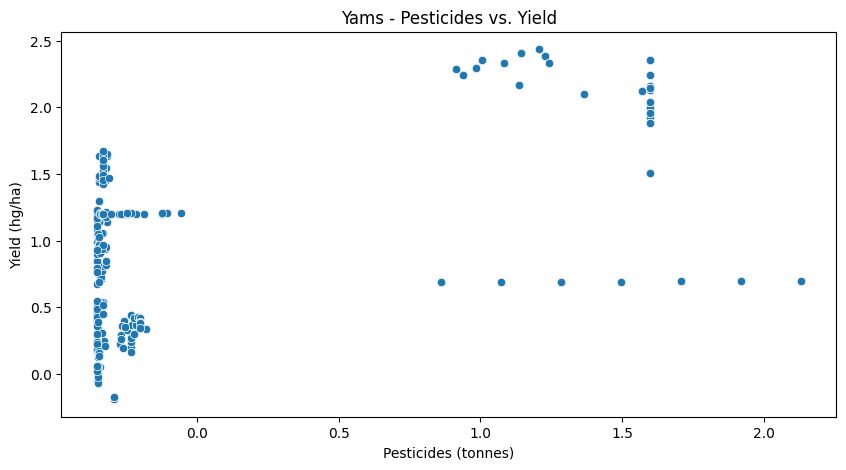

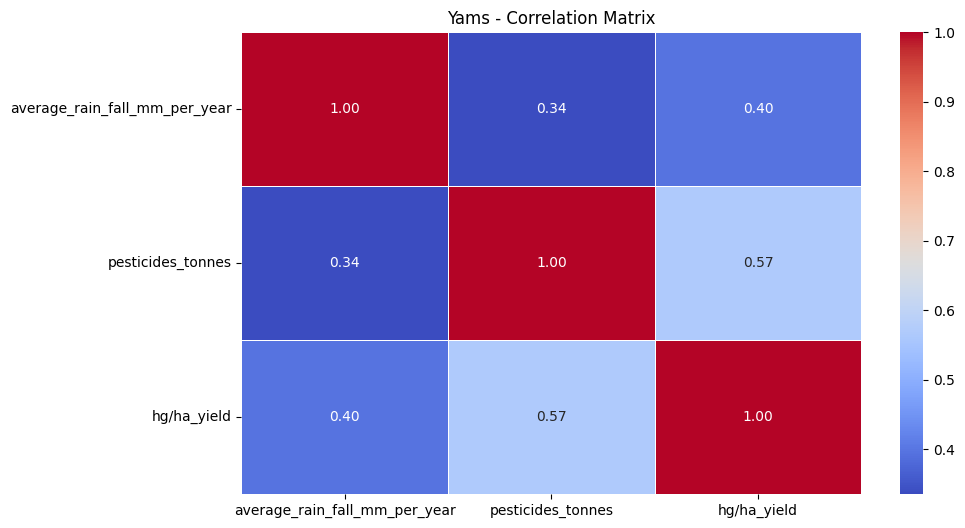

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique items in the "Item" column
unique_items = data['Item'].unique()

# Loop through each unique item
for item in unique_items:
    # Subset the data for the current item
    item_data = data[data['Item'] == item]

    # Scatter plot for Average Rainfall vs. Yield for the current item
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=item_data)
    plt.title(f'{item} - Average Rainfall vs. Yield')
    plt.xlabel('Average Rainfall (mm per year)')
    plt.ylabel('Yield (hg/ha)')
    plt.show()

    # Scatter plot for Pesticides vs. Yield for the current item
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='pesticides_tonnes', y='hg/ha_yield', data=item_data)
    plt.title(f'{item} - Pesticides vs. Yield')
    plt.xlabel('Pesticides (tonnes)')
    plt.ylabel('Yield (hg/ha)')
    plt.show()

    # Calculate the correlation matrix for the current item
    correlation_matrix = item_data[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'hg/ha_yield']].corr()

    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'{item} - Correlation Matrix')
    plt.show()


# **Feature Engineering**:

**step 1:** identify needed inner features for lacking knowledge/remove un_needed data

we need information about the soil as it,along with the rain and temprature are the main contributers of the yield of the crop

**step 2:** the only soil data we can extract is from the item and area as there are only certain soils that can grow certain crops and location on map indicate type of soil as lines of longitued and latitude affect the soil quality

**step 3:** Explanation of the 'Highest_Yield_Country' Column

In the dataset, a new column named 'Highest_Yield_Country' has been created. This column serves the purpose of identifying the country (Area) that achieved the highest yield for a specific crop type in their respective countries. The column is added to provide valuable insights into which country excelled in crop yield for a given crop type.

**How it works:**

1. **Grouping by Country:** The dataset is first grouped by the 'Area' column, which represents different countries. Within each group (country), the maximum yield (hg/ha_yield) is determined.

1. **create a new column**'Highest_Yield_Crop_Label' and use the transform function to fill all rows with the same label for countries with the same highest yield crop. This ensures that all rows within the same country will have the same label in this column.

1. **rename column** to represent soil and label encode it
**Example Use Cases:**

- The 'soil' column allows us to quickly identify which country had the most productive crop yield for a given crop type.
- It can be used for comparative analysis to determine which countries excel in specific crops and their crop yield achievements.
- Researchers and analysts can leverage this information to study and understand regional variations in agricultural productivity.

Overall, the 'soil' column is a valuable addition that provides a clear reference to the top-performing countries in terms of crop yield, enabling more in-depth analyses and insights into agricultural performance.


we reached 6 types of soil which is aligned with external information

Soil is classified into four types:

* Clay
* Silt soil
* Peat
* Chernozem
* Inceptisol
* LOAMS

* ***Sand*** cant grow plants thus not used
* ***Aridisol*** cant grow plants thus not used




sandy soils are not made for agriculture so it wasnt considered

In [11]:
print( data['Area'].unique())



['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Belarus' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon' 'Canada'
 'Central African Republic' 'Chile' 'Colombia' 'Croatia' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea' 'France'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq' 'Italy' 'Jamaica' 'Japan'
 'Kazakhstan' 'Kenya' 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar'
 'Malawi' 'Malaysia' 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro'
 'Morocco' 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand'
 'Nicaragua' 'Niger' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland'
 'Portugal' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Switzerland'
 'Tajikistan' 'Thailand' 'Turkey' 'Uganda' 'Ukraine' 'Uruguay' 'Zambia'
 'Zimbabwe' 'Bahrain' 'Bel

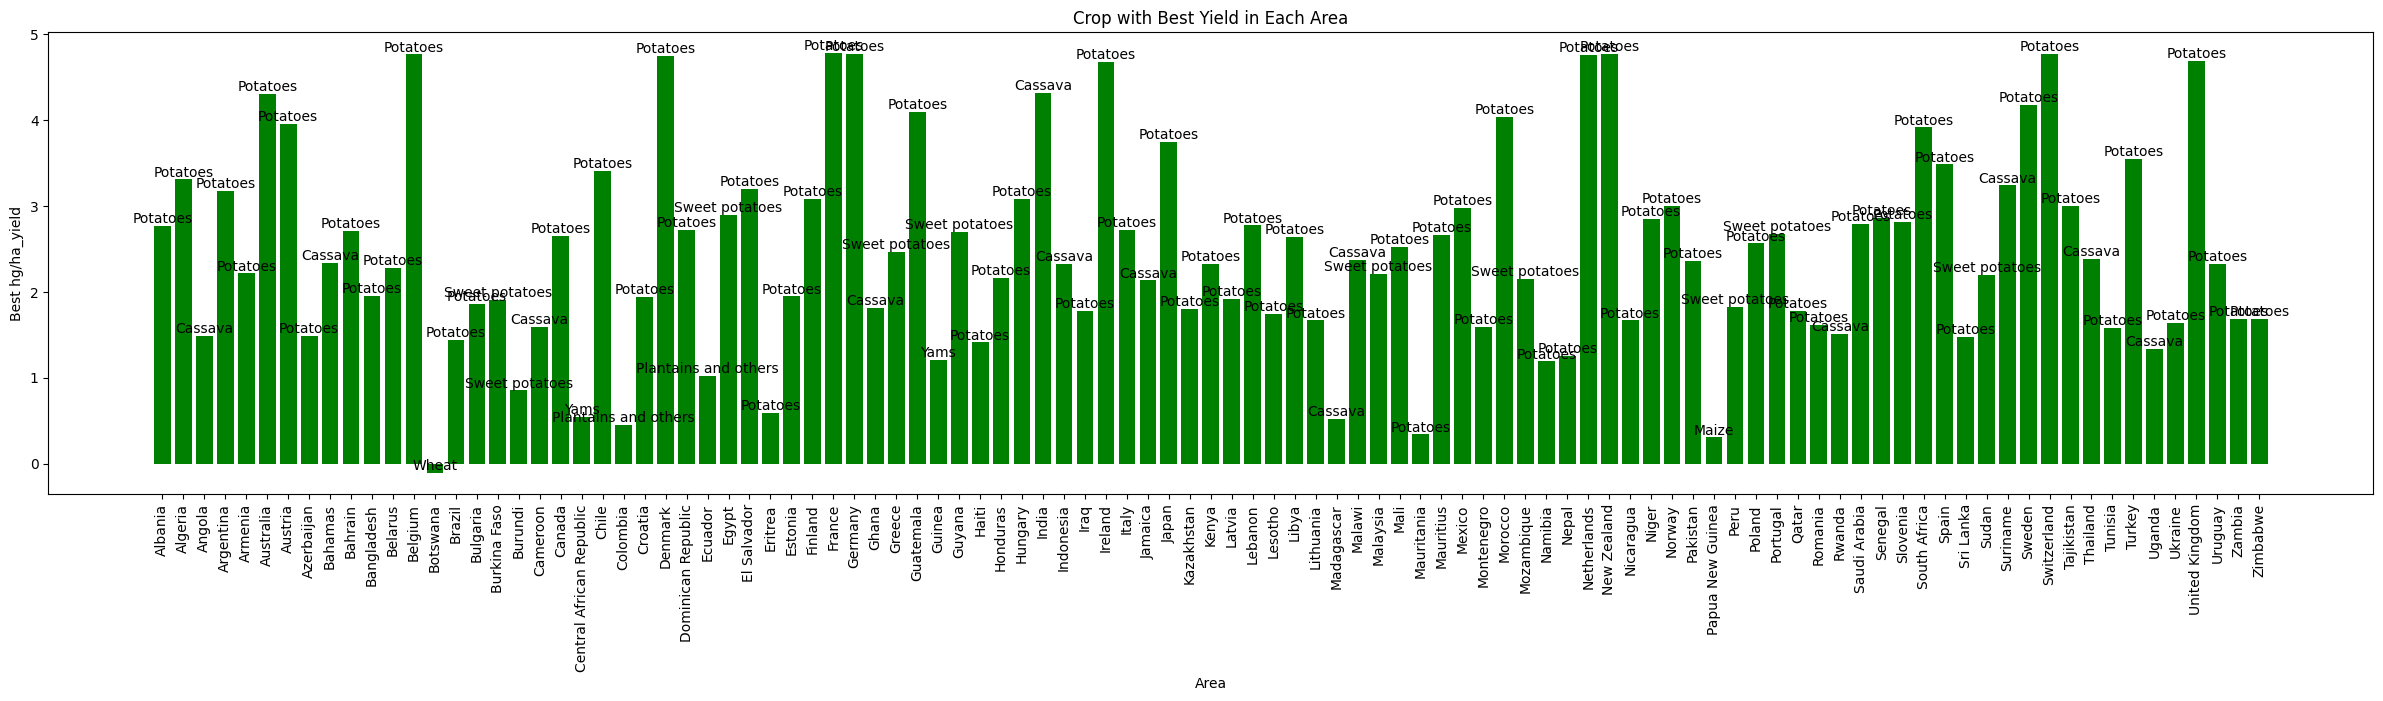

In [12]:
# Group data by 'Area' and find the crop with the best yield in each area
best_yield_per_area = data.groupby('Area')['hg/ha_yield'].idxmax()
best_crop_data = data.loc[best_yield_per_area]

# Create a bar plot to display the best crop and yield in each area with labels
plt.figure(figsize=(30, 6))
bars = plt.bar(best_crop_data['Area'], best_crop_data['hg/ha_yield'], color='green')
plt.xlabel('Area')
plt.ylabel('Best hg/ha_yield')
plt.title('Crop with Best Yield in Each Area')
plt.xticks(rotation=90)

# Add labels to the bars
for bar, crop in zip(bars, best_crop_data['Item']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), crop, ha='center', va='bottom')

plt.show()



In [13]:
# Group data by 'Area' and find the maximum yield for each country
max_yield_per_country = data.groupby('Area')['hg/ha_yield'].transform('max')

# Create a new column 'Highest_Yield_Crop_Label' and fill all rows with the same label for countries with the same highest yield crop
data['soil'] = data.groupby('Area')['Item'].transform('first')



<ipython-input-13-f8b43324eb70>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['soil'] = data.groupby('Area')['Item'].transform('first')


In [14]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'soil' column
data['soil_encoded'] = label_encoder.fit_transform(data['soil'])

# Save the modified dataset to a new CSV file
data.to_csv('your_encoded_dataset.csv', index=False)

<ipython-input-14-514f2af9db8c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['soil_encoded'] = label_encoder.fit_transform(data['soil'])




#  **Normalizing or Standardizing Numerical Features with Consideration for Units**

When working with numerical features in a dataset, it's essential to ensure that the units of measurement are consistent. Normalization or standardization of numerical data should take into consideration the original units. This ensures that the scaling process is meaningful and maintains the relationships between different columns.

### Steps:

1. **Define Unit Conversion Factors:** To bring numerical columns to a common unit, unit conversion factors are defined for each column. These factors are used to convert values to a consistent unit. For example:
   - `rainfall_conversion_factor` converts millimeters (mm) to centimeters (cm).
   - `temperature_conversion_factor` is set to 1 since the temperature values are already in Celsius.
   - `yield_conversion_factor` converts hectograms per hectare (hg/ha) to kilograms per hectare (kg/ha).
   - `pesticides_conversion_factor` converts tonnes to kilograms.

2. **Apply Unit Conversion:** The defined unit conversion factors are applied to the respective columns to create new columns with values in the target unit.

3. **Choose Scaling Method:** You have the option to choose between two commonly used scaling methods: `StandardScaler` (z-score standardization) and `MinMaxScaler` (min-max normalization). The choice depends on your specific data requirements.

4. **Apply Scaling:** The selected scaler is applied to the columns that need scaling. This standardizes or normalizes the data based on the converted values.

5. **Optional Reversion:** If needed for interpretation or analysis, you can revert the scaled data back to the original units by applying the scaler's `inverse_transform` method.

6. **Save the Modified Dataset:** The dataset with the standardized units is saved to a new CSV file for further analysis or use.

These steps help ensure that numerical data is appropriately scaled while preserving the integrity of the original units. This is especially important when dealing with datasets that contain measurements in various units or scales.

In [15]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define unit conversion factors for each numerical column to bring them to a common unit
rainfall_conversion_factor = 0.1  # Convert mm to cm
temperature_conversion_factor = 1  # No unit change (already in Celsius)
yield_conversion_factor = 0.01  # Convert hg/ha to kg/ha (assuming hg is hectograms)
pesticides_conversion_factor = 1000  # Convert tonnes to kilograms

# Apply unit conversion to the numerical columns
data['average_rain_fall_cm_per_year'] = data['average_rain_fall_mm_per_year'] * rainfall_conversion_factor
data['avg_temp_celsius'] = data['avg_temp'] * temperature_conversion_factor
data['hg/ha_yield_kg_per_ha'] = data['hg/ha_yield'] * yield_conversion_factor
data['pesticides_kilograms'] = data['pesticides_tonnes'] * pesticides_conversion_factor

# Define the columns to be standardized or normalized
columns_to_scale = ['average_rain_fall_cm_per_year', 'avg_temp_celsius', 'hg/ha_yield_kg_per_ha', 'pesticides_kilograms']

# Choose either StandardScaler (z-score standardization) or MinMaxScaler (min-max normalization) based on your needs
scaler = StandardScaler()
# scaler = MinMaxScaler()

# Apply standardization or normalization to the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Optionally, you can revert the scaled data back to the original units
# data[columns_to_scale] = scaler.inverse_transform(data[columns_to_scale])

# Save the modified dataset to a new CSV file
data.to_csv('your_standardized_dataset.csv', index=False)


<ipython-input-15-76a82b0f911e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['average_rain_fall_cm_per_year'] = data['average_rain_fall_mm_per_year'] * rainfall_conversion_factor
<ipython-input-15-76a82b0f911e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avg_temp_celsius'] = data['avg_temp'] * temperature_conversion_factor
<ipython-input-15-76a82b0f911e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [16]:
print(data.columns)

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'hg/ha_yield', 'soil', 'soil_encoded',
       'average_rain_fall_cm_per_year', 'avg_temp_celsius',
       'hg/ha_yield_kg_per_ha', 'pesticides_kilograms'],
      dtype='object')


columns we are intrested in are

* Item
* Area
* soil_encoded
* average_rain_fall_cm_per_year
* avg_temp_celsius
* hg/ha_yield_kg_per_ha
* pesticides_kilograms



---



<ipython-input-17-22e4b1b08b29>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =  subset_data.corr()


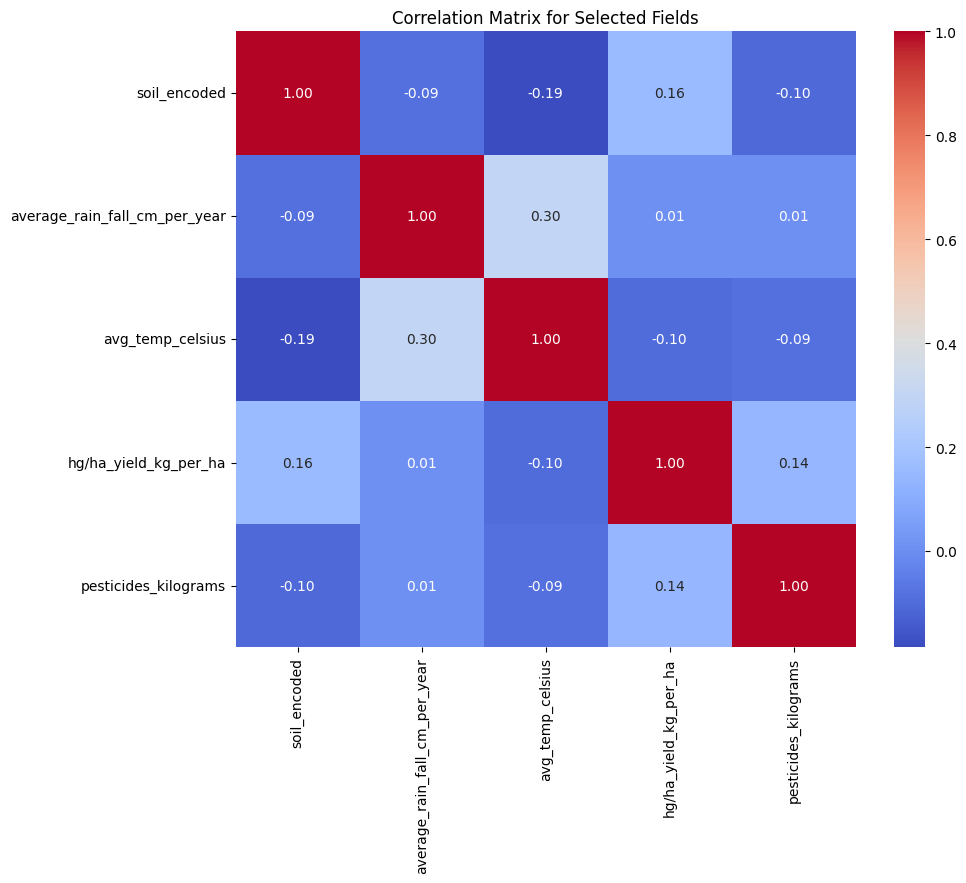

In [17]:
# Define the columns you want to include in the correlation matrix
selected_columns = ['Item', 'Area', 'soil_encoded', 'average_rain_fall_cm_per_year','avg_temp_celsius','hg/ha_yield_kg_per_ha','pesticides_kilograms']

# Subset the data to include only the selected columns
subset_data = data[selected_columns]

# Compute the correlation matrix for the selected columns
correlation_matrix =  subset_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Fields')
plt.show()


In [18]:
for i in data.columns :
  print(i)

Unnamed: 0
Area
Item
Year
average_rain_fall_mm_per_year
pesticides_tonnes
avg_temp
hg/ha_yield
soil
soil_encoded
average_rain_fall_cm_per_year
avg_temp_celsius
hg/ha_yield_kg_per_ha
pesticides_kilograms


# **Train-Test Split**



In [23]:
!pip install xgboost

In [25]:
import multiprocessing
import sys
import xgboost

have_cext = False
try:
    from .. import _cext
    have_cext = True
except ImportError:
    pass
except:
    print("the C extension is installed...but failed to load!")
    pass

#try:
#    import xgboost
#except ImportError:
#    pass
#except:
#    print("xgboost is installed...but failed to load!")
#    pass

In [30]:
# Define the columns you want to include in the new DataFrame
selected_columns = ['soil_encoded', 'average_rain_fall_cm_per_year', 'avg_temp_celsius', 'pesticides_kilograms', 'Area', 'Item', 'hg/ha_yield_kg_per_ha']

# Create a new DataFrame with the selected columns
data_train = data[selected_columns]

In [31]:

# Use pandas' get_dummies to perform one-hot encoding
data_train = pd.get_dummies(data_train, columns=['Area', 'Item'], prefix=['Area', 'Item'], drop_first=True)


# **Model Selection**

is a critical step in building a yield prediction model as it involves choosing the most suitable machine learning or statistical model to capture the relationships within your data and make accurate predictions. The choice of model depends on the nature of your data, the problem you are trying to solve, and your domain knowledge. In the context of yield prediction, three broad categories of models are commonly considered:

1. **Time-Series Forecasting Methods:**
   - *When to Consider:* Time-series models are appropriate when your data is collected over time, and you are interested in predicting future values based on historical observations.
   - *Models to Consider:*
     - **ARIMA (AutoRegressive Integrated Moving Average):** ARIMA is a widely used model for time series forecasting. It accounts for trends, seasonality, and autoregressive components in the data.
     - **Exponential Smoothing:** This model accounts for trends and seasonality, similar to ARIMA, but uses a different approach to weight historical data.
     - **Prophet:** Developed by Facebook, Prophet is effective for forecasting data with daily observations and holiday effects.

2. **Regressions Models:**
   - *When to Consider:* Regression models are suitable when you have a dataset with various independent variables (features) that may influence yield and you want to quantify the relationships between these features and the target variable (yield).
   - *Models to Consider:*
     - **Linear Regression:** A simple and interpretable model that assumes a linear relationship between features and yield. It's a good starting point for regression tasks.
     - **Decision Trees:** Decision trees can capture non-linear relationships and interactions between features.
     - **Random Forest:** A powerful ensemble model that combines multiple decision trees for better predictive performance.
     - **Gradient Boosting:** Models like XGBoost, LightGBM, and CatBoost are popular for regression tasks due to their ability to handle complex relationships.

3. **Time-Series Models for Sequences:**
   - *When to Consider:* If your yield prediction involves sequences or sequences of features (e.g., for multiple time steps), you may consider specialized time-series models for sequences.
   - *Models to Consider:*
     - **LSTM (Long Short-Term Memory):** A type of recurrent neural network (RNN) effective at capturing patterns and dependencies in sequences.
     - **CNN (Convolutional Neural Network):** If your data includes spatial information or images, CNNs can be useful in extracting relevant features.
     - **Hybrid Models:** You can create models that combine aspects of time-series forecasting and deep learning to handle complex sequence data.

     Certainly, here's the explanation in Markdown format:

## Why We Chose Gradient Boosting for Yield Prediction

Selecting the appropriate model for yield prediction is a critical decision in agricultural data analysis. Gradient Boosting, a powerful machine learning technique, stands out as a strong choice for several compelling reasons:

1. **Accuracy**: Gradient Boosting is renowned for its high predictive accuracy. It excels in capturing complex relationships within the data, which is crucial for modeling the multitude of factors influencing crop yield. These factors may encompass weather conditions, soil properties, agricultural practices, and crop types.

2. **Handling Non-linearity**: Crop yield prediction often involves non-linear relationships between predictor variables (features) and the target variable (yield). Gradient Boosting effectively addresses this by employing decision trees as base learners, enabling it to capture non-linear patterns.

3. **Ensemble Learning**: Gradient Boosting is an ensemble learning method. It combines multiple weak learners (typically decision trees) to create a robust and powerful predictor. The ensemble approach often results in improved predictive performance.

4. **Feature Importance**: Gradient Boosting provides a ranking of feature importance. This ranking sheds light on the relative impact of different features on yield prediction. Such insights are invaluable to domain experts in the field of agriculture.

5. **Robustness to Outliers**: In real-world agricultural datasets, outliers are not uncommon. Gradient Boosting exhibits robustness to outliers, effectively reducing their influence and, in certain cases, even identifying and accommodating them.

6. **Flexibility**: Gradient Boosting is versatile and can be applied to a wide range of regression tasks. It allows for fine-tuning through hyperparameter optimization, facilitating the attainment of optimal model performance.

8. **Interpretability**: While Gradient Boosting models may not be as interpretable as linear regression, they can still offer valuable insights. They reveal which features have the most significant influence on yield prediction, thereby aiding domain experts in comprehending the factors that impact crop yield.

In conclusion, Gradient Boosting is a potent choice for yield prediction due to its precision, ability to model non-linear relationships, ensemble learning strategy, and robustness to outliers. To fully leverage its capabilities, optimization, feature engineering, and data preprocessing are key steps. With Gradient Boosting, you can make more accurate yield predictions and informed decisions for crop management and optimization in the agricultural domain.

R-squared (R2): R-squared measures the proportion of the variance in the dependent variable (in your case, 'hg/ha_yield_kg_per_ha') that is predictable from the independent variables (features). It ranges from 0 to 1, with a higher R2 indicating a better fit. An R2 of 1 means the model perfectly predicts the target variable.

R2 = 1: Perfect prediction.
R2 = 0: The model doesn't explain any variance.
Root Mean Squared Error (RMSE): RMSE measures the average prediction error in the same units as the target variable. Lower RMSE values indicate better prediction accuracy.

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

target = 'hg/ha_yield_kg_per_ha'

# Select the features and target variable
# Define all columns as features
X = data_train.drop(columns=[target])

y = data_train[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regression model
model = xgboost.XGBRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# the standards for a good R-squared reading can be much higher, such as 0.9 or above.

Root Mean Squared Error (RMSE): 0.20
R-squared (R2): 0.96
